# **Исследовательский анализ рынка вакансий для HR Агентства**

В нашем распоряжении датасет vacancy_clear.xlsx хранящий информацию о вакансиях размещённых в HR агентстве.


**Цель работы**
Выявить признаки вакансий, привлекающих наибольшее внимание кандидатов и успешно закрывающихся силами агентства.


Исследование проходит в 6 этапов:



1.   Загрузка данных
2.   Предобработка данных
3.   Исследовательский анализ данных, генерация новых признаков
4.   Построение воронки закрытия вакансии
5.   Выдвижение гипотез и их опровержение / проверка
6.   Подготовка презентации


# Загрузка данных

Подключим необходимые библиотеки и загрузим датасет

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime, timedelta
from plotly import graph_objects as go
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [2]:
pd.set_option('display.max_columns', 35)

In [3]:
sns.set_style('darkgrid')

In [4]:
csv_file_path = 'vacancy_clear_statistics.csv'
df = pd.read_csv(csv_file_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1284 non-null   int64  
 1   Статус                     1284 non-null   object 
 2   Источник лида              1274 non-null   object 
 3   Менеджер                   1193 non-null   object 
 4   Дата публикации            1284 non-null   object 
 5   Дата закрытия              1127 non-null   object 
 6   Количество просмотров      1284 non-null   int64  
 7   Количество откликов        1284 non-null   int64  
 8   Позиция                    1284 non-null   object 
 9   Зарплата от                469 non-null    float64
 10  Зарплата до                372 non-null    float64
 11  Город                      1284 non-null   object 
 12  Формат оформления          1284 non-null   object 
 13  Формат работы              1284 non-null   objec

Датафрейм имеет 22 колонки и 1284 строки.  Присутствуют пропуски в данных

In [6]:
df.head()

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,Зарплата до,Город,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,NaN,Москва,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,100000.0,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме\r\n- Техническое интервью с ...,У нас вы получите возможность:\r\n- Работать с...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,NaN,Москва,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение\...,1. Скрининг резюме\r\n2. Тестовое задание\r\n3...,Стабильный оклад + премия по итогам года/проек...


# Предобработка данных

Детально просмотрим каждый столбец. Проверим наличие пропусков и ошибок в заполнении данных.

Поменяем названия столбцов, так как это будет удобно для дальнейшей работы.

In [7]:
columns_start = df.columns.tolist()

columns_end = ['id', 'status', 'source', 'manager',
               'publication_date', 'closing_date', 'views', 'responses',
               'position', 'salary_from', 'salary_up_to', 'city',
               'design_format', 'work_format', 'experience',
               'education', 'employment', 'link_to_test',
         'main_requirements', 'add_requirements', 'selection_stages', 'conditions']

change_col_dict = {k:v for k, v in zip(columns_start, columns_end)}

df = df.rename(columns=change_col_dict)
df.head()

,id,status,source,manager,publication_date,closing_date,views,responses,position,salary_from,salary_up_to,city,design_format,work_format,experience,education,employment,link_to_test,main_requirements,add_requirements,selection_stages,conditions
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,NaN,Москва,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,100000.0,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме\r\n- Техническое интервью с ...,У нас вы получите возможность:\r\n- Работать с...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,NaN,Москва,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение\...,1. Скрининг резюме\r\n2. Тестовое задание\r\n3...,Стабильный оклад + премия по итогам года/проек...


Проверим наличие явных дубликатов в данных

In [8]:
df.duplicated().sum()

0

## Столбец `id`

Просмотрим наличие явных дубликатов в столбце

In [9]:
df['id'].duplicated().sum()

0

Явных дубликатов в столбце id нет

## Столбец `status`

In [10]:
df.status.value_counts()

status
Архив              701
Закрыта нами       320
Отклонена          105
На рассмотрении     90
Активна             68
Name: count, dtype: int64

В столбце отсутствуют неявные дубликаты и пропуски. Данный столбец содержит категориальные значения, всего их 5:


*	Архив - вакансия закрыта, не удалось найти подходящую кандидатуру силами агентства;
*	Закрыта нами - вакансия закрыта, подходящая кандидатура найдена силами агентства;
*	Активна - вакансия опубликована, идет активный поиск кандидатов;
*	На рассмотрении - пул кандидатов набран, заказчик осуществляет отбор, набор новых кандидатов не ведется;
*	Отклонена - заказчик отказался от рассмотрения пула кандидатов, набор кандидатов не ведется.



## Столбец `source`

In [11]:
df.source.value_counts()

source
Повторная          511
Сорсинг            330
Входящая заявка    217
Реферальная        216
Name: count, dtype: int64

В столбце отсутствуют неявные дубликаты. В данном столбце отсутствуют данные по 10 вакансиям. Столбец содержит категориальные значения, всего их 4:

* Входящая заявка - заказчик сам заполнил форму на сайте КА;
* Сорсинг - менеджеры КА привлекли заказчика исходящим поиском;
* Повторная - это не первая вакансия компании, подбор на которую будет делать КА;
* Реферальная - заказчик пришел в КА по рекомендации от другого заказчика.



## Столбец `manager`

От столбца содержащих информацию о менеджерах можно избавиться, так как он не поможет в дальнейшем исследовании и скорее несет информацию позволяющею оценить качество работы менеджеров.

In [12]:
df.drop('manager', axis= 1 , inplace= True )

## Столбцы `publication_date` и `closing_date`

Преобразуем столбцы с датами к необходимому типу и просмотрим на наличие аномальных значений.

In [13]:
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['closing_date'] = pd.to_datetime(df['closing_date'])

In [14]:
df.publication_date.describe()

count                             1284
mean     2023-07-02 08:17:56.635514112
min                2023-01-09 00:00:00
25%                2023-04-13 00:00:00
50%                2023-07-05 00:00:00
75%                2023-09-12 00:00:00
max                2023-12-29 00:00:00
Name: publication_date, dtype: object

In [15]:
df.closing_date.describe()

count                             1127
mean     2023-08-04 04:18:06.069210112
min                2023-01-24 00:00:00
25%                2023-06-06 00:00:00
50%                2023-08-15 00:00:00
75%                2023-10-12 00:00:00
max                2024-01-09 00:00:00
Name: closing_date, dtype: object

In [16]:
df.query('closing_date.isna()')['status'].unique()

array(['Активна', 'На рассмотрении'], dtype=object)

Аномальных значений нет, данные заявки публикуются с 2023-01-09 по 2023-12-29, закрываются с 2023-01-24 по 2024-01-09. В столбце с датой закрытия заявки присутствуют пропуски, данные пропуски объясняются тем, что вакансии активны или находятся на рассмотрении.

## Столбец `position`




In [17]:
df.position.nunique()

684

In [18]:
df.query('position=="https://ertelecom.ru/"')

,id,status,source,publication_date,closing_date,views,responses,position,salary_from,salary_up_to,city,design_format,work_format,experience,education,employment,link_to_test,main_requirements,add_requirements,selection_stages,conditions
474,905,Архив,Сорсинг,2023-05-29,2023-07-10,99,12,https://ertelecom.ru/,41000.0,51000.0,Пермь,Трудовой договор,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,"Умеешь общаться в чатах, мессенджерах\r\n Пише...",NaN,1. Скрининг резюме. \r\n2. Собеседование с HR.,Прозрачная система мотивации (оклад + премия о...


Всего в датасете 684 уникальных позиций, нет какой-либо стандартизации, по всей видимости каждая компания самостоятельно определяет название вакансии и вносит различные дополнения к названию позиции. Среди позиции был обнаружен сайт компании, восстановить название нет возможности, оставим как есть, в дальнейшем это не скажется на анализе.

## Столбцы `salary_from` и `salary_up_to`

Некоторые вакансии указывали заработные платы в долларах, необходимо преобразовать их в рубли

In [19]:
df.query('salary_from>1 and salary_from<3000')

,id,status,source,publication_date,closing_date,views,responses,position,salary_from,salary_up_to,city,design_format,work_format,experience,education,employment,link_to_test,main_requirements,add_requirements,selection_stages,conditions
133,451,Архив,Сорсинг,2023-02-17,2023-03-02,32,7,HR генералист,500.0,NaN,Бишкек,"Самозанятость, ИП","Офис, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,- коммуникабельность и отсутствие страха задав...,- опыт удаленной работы;\r\n- опыт на аналогич...,HR-собеседование;\r\nтестовое задание;\r\nвстр...,- отличные коллеги и руководители;\r\n- конкур...
170,499,Архив,Входящая заявка,2023-03-06,2023-05-02,38,10,Рекрутер-сорсер (с английским),1200.0,1300.0,Москва,Контракт,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,"- навыки сорсинга: boolean search, X-ray;\r\n-...",NaN,1. Скрининг резюме\r\n2. Интервью с рекрутером...,"- оплата в USD или в рублях, как тебе удобно, ..."
755,1339,Архив,Входящая заявка,2023-08-07,2023-09-18,6,3,Middle Product Manager,1300.0,2000.0,Москва,Контракт,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,What we will be expecting from you:\r\n— a dee...,It will be totally cool if you have:\r\n— prio...,1 этап: ассессмент (небольшие задачки на 30 ми...,"What we offer:\r\n— remote work, service agree..."
981,1663,Закрыта нами,Входящая заявка,2023-09-14,2023-10-26,295,39,"Data Analyst, Data Scientist",700.0,1500.0,Lincoln,Контракт,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,We are looking for a data analyst and a data s...,Work experience for marketing agencies is a pl...,1. Интервью на русском \r\n2. Интервью на англ...,"Работа из любой точки мира, уникальный опыт ра..."
1016,1709,Закрыта нами,Повторная,2023-09-26,2023-10-12,69,32,QA Engineer в международный проект о здоровье,1000.0,1000.0,Самуи,Трудовой договор,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,"Ожидаем, что вы знакомы с принципами продуктов...","Круто, если вы проявляете интерес к постоянном...",Для отклика заполните анкету (займет 20–30 мин...,Вы можете жить в любой стране — компания изнач...
1253,2036,Активна,Повторная,2023-12-14,NaT,79,21,Data Analyst,500.0,900.0,Lincoln,Контракт,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,"Technical Skills:\r\nPython (Numpy, Pandas, vi...",Experience with web parsing and scraping.\r\nE...,1. Interview in Russian \r\n2. Assessment Task...,"International experience, Independent contract..."


In [20]:
df.loc[(df['salary_from']>1) & (df['salary_from']<3000),'salary_from'] = df.loc[(df['salary_from']>1) & (df['salary_from']<3000),'salary_from']*92
df.loc[(df['salary_up_to']>1) & (df['salary_up_to']<2000),'salary_up_to'] = df.loc[(df['salary_up_to']>1) & (df['salary_up_to']<2000),'salary_up_to']*92
df['salary_from'].replace(0, np.nan, inplace=True)
df['salary_up_to'].replace(0, np.nan, inplace=True)

In [21]:
df.salary_from.describe()

count       466.000000
mean      48383.154506
std       25033.899179
min        5000.000000
25%       30000.000000
50%       40000.000000
75%       60000.000000
max      150000.000000
Name: salary_from, dtype: float64

In [22]:
df.salary_up_to.describe()

count       370.000000
mean      76520.486486
std       40527.703032
min        1380.000000
25%       50000.000000
50%       70000.000000
75%      100000.000000
max      250000.000000
Name: salary_up_to, dtype: float64

В данных присутствуют 0 значения, скорее всего это означает, что компания не хотела размещать заработную плату, заполним эти данные значением NaN

## Столбец `city`

In [23]:
display(df.city.nunique())
df.city.unique()

98

array(['Москва', 'Ростов-на-Дону', 'Санкт-Петербург', 'Челябинск',
       'Москва, Санкт-Петербург', 'Тбилиси', 'Новосибирск', 'Казань',
       'Москва, Тбилиси', 'Краснодар', 'Самара', 'Тула',
       'Москва, Ростов-на-Дону', 'Алматы, Ангарск, Москва',
       'Москва, Санкт-Петербург, Хабаровск, Иннополис, Самара',
       'Москва, Тбилиси, Санкт-Петербург', 'Алматы', 'Будва', 'Бишкек',
       'Нижний Новгород', 'Екатеринбург',
       'Калининград, Екатеринбург, Таганрог, Тверь, Казань, Тбилиси, Оренбург, Воронеж, Ульяновск, Петрозаводск, Самара',
       'Москва, Казань, Санкт-Петербург', 'Москва, Санкт-Петербург, Омск',
       'Пятигорск', 'Новороссийск, Екатеринбург, Санкт-Петербург',
       'Москва, Омск', 'Москва, Екатеринбург, Санкт-Петербург',
       'Алматы, Шымкент (Чимкент)', 'Уфа',
       'Москва, Санкт-Петербург, Новосибирск',
       'Санкт-Петербург, Волгоград, Уфа, Сургут, Екатеринбург, Москва, Ярославль, Казань, Владивосток, Иркутск, Нижний Новгород, Новосибирск, Самара, 

In [24]:
df['city'] = df['city'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))

In [25]:
df.city.nunique()

98

Неявных дубликатов не обнаружено, пропусков в данных нет.

## Столбец `design_format`

In [26]:
display(df.design_format.nunique())
df.design_format.unique()

27

array(['ИП, ГПХ, Самозанятость, Контракт, Трудовой договор', 'ГПХ',
       'Трудовой договор', 'Самозанятость, ИП', 'Самозанятость, ГПХ',
       'Самозанятость', 'Самозанятость, Контракт, ИП, ГПХ',
       'Самозанятость, ИП, ГПХ', 'Контракт',
       'Самозанятость, Трудовой договор', 'Трудовой договор, ГПХ',
       'Самозанятость, Трудовой договор, ГПХ',
       'Самозанятость, ИП, Трудовой договор, ГПХ',
       'Контракт, Трудовой договор, ГПХ', 'Контракт, ГПХ',
       'Контракт, Трудовой договор', 'Самозанятость, ИП, Контракт',
       'Самозанятость, Контракт',
       'Самозанятость, Контракт, Трудовой договор',
       'Самозанятость, Контракт, ГПХ',
       'Самозанятость, ИП, Трудовой договор', 'ИП, ГПХ', 'ИП',
       'Контракт, ИП, ГПХ',
       'Самозанятость, Контракт, Трудовой договор, ГПХ',
       'ИП, Трудовой договор, ГПХ', 'ИП, Трудовой договор'], dtype=object)

In [27]:
df['design_format'] = df['design_format'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))
df.design_format.nunique()

27

Неявных дубликатов в данных не обнаружено

## Столбец `work_format`

In [28]:
df.work_format.unique()

array(['Удаленка', 'Офис', 'Офис, Гибрид', 'Гибрид, Удаленка',
       'Офис, Гибрид, Удаленка', 'Офис, Удаленка', 'Гибрид'], dtype=object)

Неявных дубликатов нет

## Столбцы `views` и `responses`

In [29]:
df.views.describe()

count    1284.000000
mean       40.193146
std        38.710429
min         1.000000
25%        15.000000
50%        30.000000
75%        51.000000
max       317.000000
Name: views, dtype: float64

In [30]:
df.responses.describe()

count    1284.000000
mean       11.512461
std        12.660222
min         1.000000
25%         4.000000
50%         8.000000
75%        15.000000
max       151.000000
Name: responses, dtype: float64

Аномальных значений не обнаружено, пропусков в данных нет

## Столбец `experience`

In [31]:
df.experience.unique()

array(['До 1 года опыта, возможен опыт в pet-проектах; без опыта',
       'До 1 года опыта, возможен опыт в pet-проектах', 'Опыт от 1 года',
       'Без опыта'], dtype=object)

Неявных дубликатов и пропусков в данных нет.

## Столбец `education`

In [32]:
df.education.unique()

array(['Другое, На смежных специальностях, Профильное',
       'На смежных специальностях, Профильное', 'Профильное'],
      dtype=object)

Неявных дубликатов и пропусков в данных нет.

## Столбец `employment`

In [33]:
display(df.employment.nunique())
df.employment.unique()

21

array(['Проектная, Частичная', 'Частичная', 'Полная', 'Проектная',
       'Стажировка, Частичная', 'Стажировка, Проектная, Частичная',
       'Волонтерство, Проектная, Частичная, Стажировка, Полная',
       'Проектная, Частичная, Полная', 'Стажировка, Проектная',
       'Частичная, Полная', 'Проектная, Полная', 'Стажировка',
       'Стажировка, Частичная, Полная',
       'Стажировка, Волонтерство, Проектная, Частичная',
       'Стажировка, Волонтерство, Проектная',
       'Стажировка, Волонтерство, Частичная', 'Стажировка, Волонтерство',
       'Стажировка, Проектная, Частичная, Полная', 'Стажировка, Полная',
       'Стажировка, Проектная, Полная', 'Волонтерство'], dtype=object)

In [34]:
df['employment'] = df['employment'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))
df.employment.nunique()

21

Неявных дубликатов и пропусков в данных нет.

## Столбец `link_to_test`

In [35]:
df.link_to_test.unique()

array(['нет', 'да'], dtype=object)

Неявных дубликатов и пропусков в данных нет.

## Столбец `main_requirements`

In [36]:
df.main_requirements.nunique()

1218

In [37]:
df.main_requirements.unique()

array(['Наш стек: Python, fastapi, postgres, gitlab\nПожелания:\n- Опыт использования одного из фреймворков/библиотек для написания сервисов на RESTful API\n- Понимание как работает асинхронность и многопоточность в Python\n- Знание основ Git\n- Базовое знание SQL',
       '1) Широкий IT-кругозор, понимание, какие бывают языки программирования и для чего они используются.\n2) Владение хотя быть одним современным языком программирования (Java, Python, PHP, C#, Go, JavaScript и/или C++), желательно знание на базовом уровне языка запросов SQL и базовые навыки вёрстки веб-страниц (HTML/CSS).\n3) Свободное владение разговорным английским языком.\n4) Системность, аналитический склад ума и умение чувствовать других людей.\n5) Желание и готовность проводить собеседования и оценивать специалистов',
       'умение самостоятельно разбираться в чужом коде;\r\nопыт самостоятельной работы над коммерческими проектами;\r\nспособность к самоорганизации и самодисциплине;\r\nумение оценивать трудоемкость

In [38]:
df['main_requirements'] = df['main_requirements']\
    .str.replace('_x000D_\n',' ', regex=True).str.replace('\n',' ', regex=True).str.replace('  ',' ', regex=True)
df.main_requirements.nunique()

1217

Из-за получения данных из exel, появились ошибки скрытые пробелы и переносы строк. После их удаления, исчезли 14 неявных дубликата

## Столбец `add_requirements`


In [39]:
df.add_requirements.nunique()

618

In [40]:
df['add_requirements'] = df['add_requirements']\
    .str.replace('_x000D_\n',' ', regex=True).str.replace('\n',' ', regex=True).str.replace('  ',' ', regex=True)
df.add_requirements.nunique()

618

Присутствуют пропуски в данных, которые нечем заполнить. Так же как и в предыдущем столбце удалены пробелы и знаки переносов. В итоге исчезли 3 неявных дубликата.

## Столбец `selection_stages`


In [41]:
df.selection_stages.nunique()

841

In [42]:
df['selection_stages'] = df['selection_stages']\
    .str.replace('_x000D_\n',' ', regex=True).str.replace('\n',' ', regex=True).str.replace('  ',' ', regex=True)
df.selection_stages.nunique()

841

Удалены неявные дубликаты (36 значений)

## Столбец `conditions`


In [43]:
df.conditions.nunique()

1167

In [44]:
df['conditions'] = df['conditions']\
    .str.replace('_x000D_\n',' ', regex=True).str.replace('\n',' ', regex=True).str.replace('  ',' ', regex=True)
df.conditions.nunique()

1167

Удаленно 29 неявных дубликатов.

## Вывод

На этапе преобработке данных были выполнены следующие пункты:


*   Удалены избыточные данные
*   Столбцы приведены к нужным типам данных
*   Удалены неявные дубликаты

Пропуски в данных не были заполнены, так как в некоторых случаях данные не были заполнены специально, к примеру заявка не закрыта. По остальным нет возможности восстановить данные. По итогу предобработки не было удаленно ни одной строки.



# Исследовательский анализ

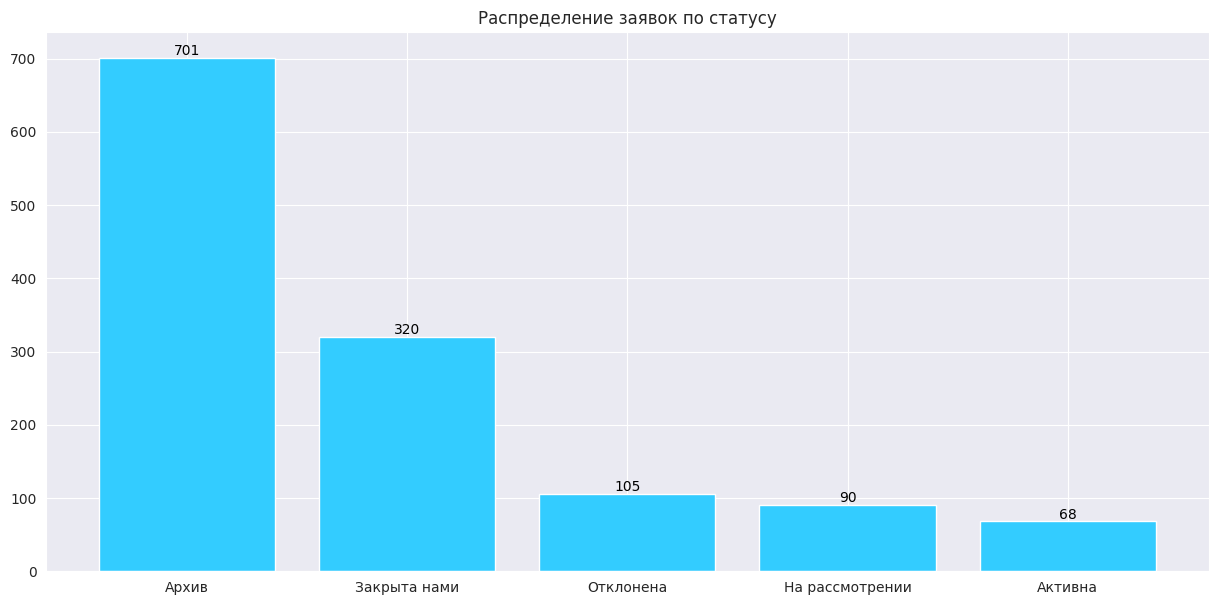

In [45]:
status = df.groupby('status')['id'].count().reset_index().sort_values('id',ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(status['status'], status['id'],color='#33ccff')

for x, y, tex in zip(status['status'], status['id'], status['id']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black'})

plt.title('Распределение заявок по статусу')
plt.xticks(rotation=0)

plt.show()

**Наибольшее количество вакансий находится в архиве 54.59%. 24.92% закрыты нами, отклонено 8.17% заявок.**

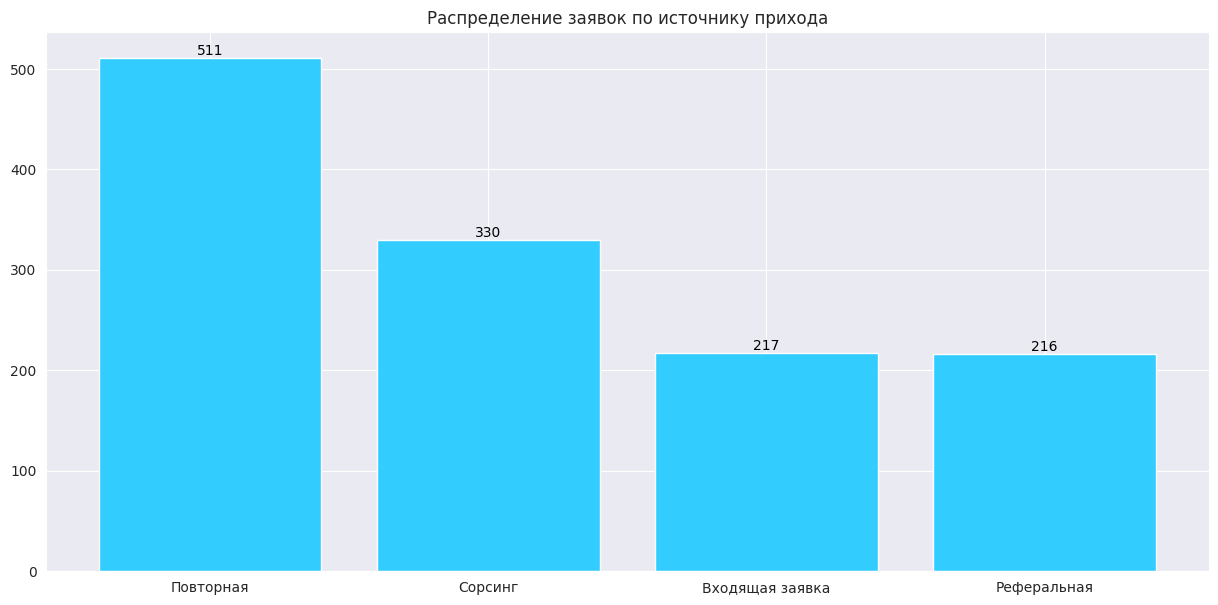

In [46]:
source = df.groupby('source')['id'].count().reset_index().sort_values('id',ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(source['source'], source['id'],color='#33ccff')

for x, y, tex in zip(source['source'], source['id'], source['id']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black'})

plt.title('Распределение заявок по источнику прихода')
plt.xticks(rotation=0)


plt.show()

**За 2023 год больше всего клиентов получено из повторных обращений, на них приходится 39.8%. Благодаря работе менеджеров было привлечено 330 заявки, что составляет 25.7% от всех заявок.**

In [47]:
line_graph = df.copy()
line_graph['month'] = line_graph['publication_date'].dt.to_period('M').dt.to_timestamp().astype(str).str[:-3]
line_graph = line_graph.groupby('month')['id'].count().reset_index()
line_graph

,month,id
0,2023-01,82
1,2023-02,66
2,2023-03,118
3,2023-04,132
4,2023-05,85
5,2023-06,133
6,2023-07,126
7,2023-08,181
8,2023-09,101
9,2023-10,105


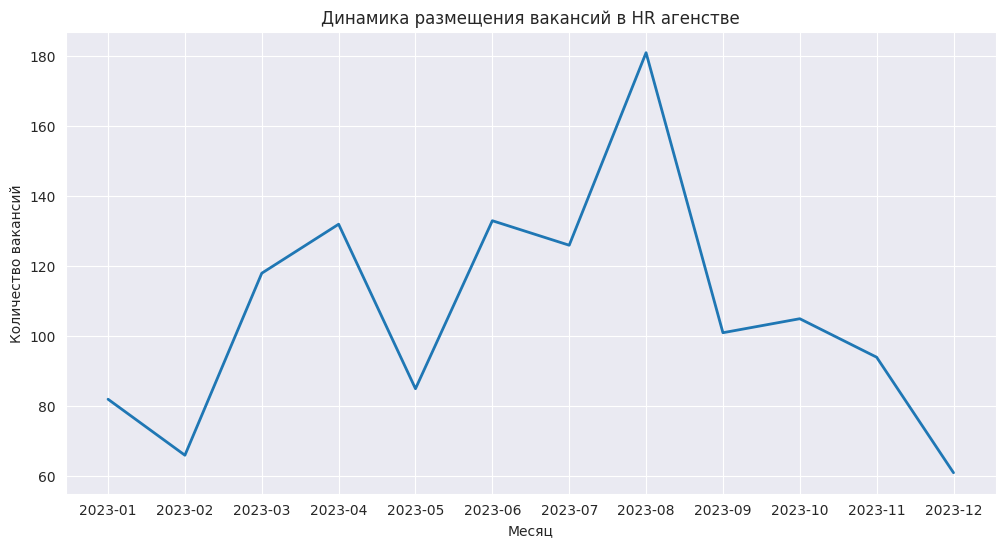

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(line_graph['month'],
         line_graph['id'],
         linewidth=2
         )

plt.title('Динамика размещения вакансий в HR агенстве')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')

plt.show()

**Больше всего размещения вакансий приходится на лето. Также популярны март и апрель, меньше всего размещений приходится на зимние месяцы, возможно это связанно с праздниками.**

In [49]:
line_graph_views = df.copy()
line_graph_views['month'] = line_graph_views['publication_date'].dt.to_period('M').dt.to_timestamp().astype(str).str[:-3]
line_graph_views = line_graph_views.groupby('month')['views'].sum().reset_index()

line_graph_responses = df.copy()
line_graph_responses['month'] = line_graph_responses['publication_date'].dt.to_period('M').dt.to_timestamp().astype(str).str[:-3]
line_graph_responses = line_graph_responses.groupby('month')['responses'].sum().reset_index()
display(line_graph_responses.sort_values('responses',ascending=False))
display(line_graph_views.sort_values('views',ascending=False))

,month,responses
7,2023-08,2166
9,2023-10,1627
8,2023-09,1452
6,2023-07,1377
10,2023-11,1341
3,2023-04,1302
2,2023-03,1176
5,2023-06,1174
4,2023-05,919
11,2023-12,900


,month,views
7,2023-08,7986
8,2023-09,5551
3,2023-04,4971
6,2023-07,4795
9,2023-10,4548
5,2023-06,4526
2,2023-03,4524
10,2023-11,4420
4,2023-05,2940
11,2023-12,2764


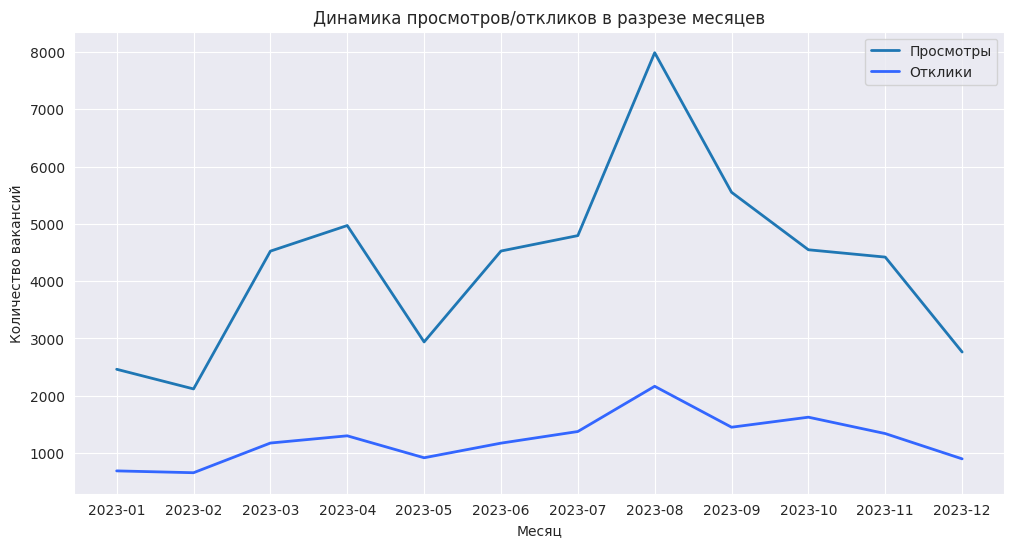

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(line_graph_views['month'],
         line_graph_views['views'],
         linewidth=2,
         label='Просмотры'
         )
plt.plot(line_graph_responses['month'],
         line_graph_responses['responses'],
         linewidth=2,
         color='#3366ff',
         label='Отклики'
         )
plt.title('Динамика просмотров/откликов в разрезе месяцев')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.legend()
plt.show()

**Самым популярными месяцами по количеству просмотров вакансий стали:08, 09, 04, 07. По откликам большего всего было в следующих месяцах: 08, 10, 09, 07.**

In [51]:
line_graph = df.copy()
line_graph['month'] = line_graph['closing_date'].dt.to_period('M').dt.to_timestamp().astype(str).str[:-3]
line_graph = line_graph.query('month!=""')
line_graph_we = line_graph.query('status=="Закрыта нами"').groupby('month')['id'].count().reset_index()
line_graph_archive = line_graph.query('status=="Архив"').groupby('month')['id'].count().reset_index()
line_graph_rejected = line_graph.query('status=="Отклонена"').groupby('month')['id'].count().reset_index()

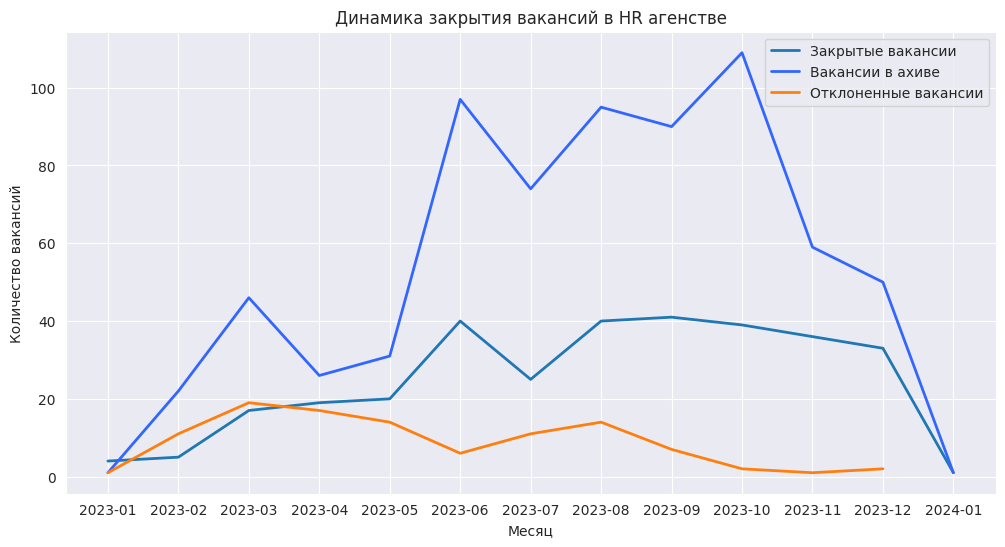

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(line_graph_we['month'],
         line_graph_we['id'],
         linewidth=2,
         label='Закрытые вакансии'
         )
plt.plot(line_graph_archive['month'],
         line_graph_archive['id'],
         linewidth=2,
         color='#3366ff',
         label='Вакансии в ахиве'
         )

plt.plot(line_graph_rejected['month'],
         line_graph_rejected['id'],
         linewidth=2,
         label='Отклоненные вакансии'
         )
plt.title('Динамика закрытия вакансий в HR агенстве')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.legend()
plt.show()

**По всем месяцам закрытие вакансий по средствам переноса их в архив больше чем самостоятельное закрытие, также есть месяца когда было больше отклоненных вакансий чем закрытых самостоятельно — от начала года до середины марта. Также можно отметить, что HR агентство не может преодолеть порог в 41 закрытую вакансию.**

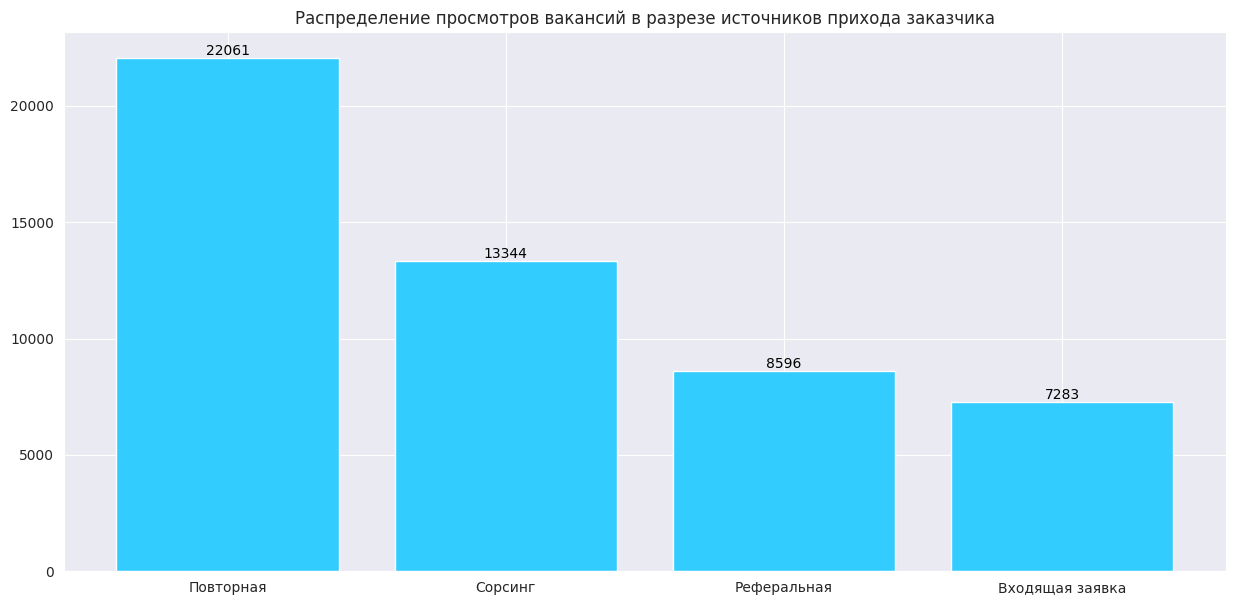

In [53]:
views = df.groupby('source')['views'].sum().reset_index().sort_values('views',ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(views['source'], views['views'],color='#33ccff')

for x, y, tex in zip(views['source'], views['views'], views['views']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black'})

plt.title('Распределение просмотров вакансий в разрезе источников прихода заказчика')
plt.xticks(rotation=0)


plt.show()

**Вакансии из входящих заявок имеют меньше всего просмотров, это интересно тем, что у него, как и у Реферального источника равное количество размещений. Разница составляет 1313 просмотров.**

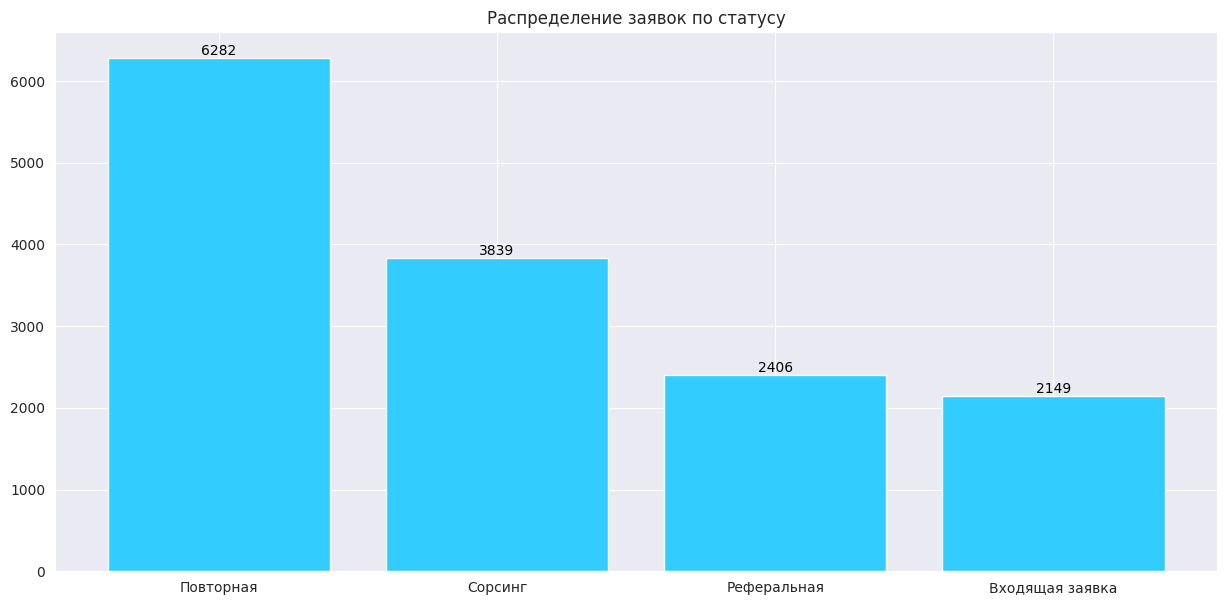

In [54]:
responses = df.groupby('source')['responses'].sum().reset_index().sort_values('responses',ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(responses['source'], responses['responses'],color='#33ccff')

for x, y, tex in zip(responses['source'], responses['responses'], responses['responses']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black'})

plt.title('Распределение заявок по статусу')
plt.xticks(rotation=0)


plt.show()

**На откликах данные из источников Реферальная и Входящая заявка начинают выравниваться, все остальные данные пропорциональны количеству размещений вакансий.**

count       466.000000
mean      48383.154506
std       25033.899179
min        5000.000000
25%       30000.000000
50%       40000.000000
75%       60000.000000
max      150000.000000
Name: salary_from, dtype: float64

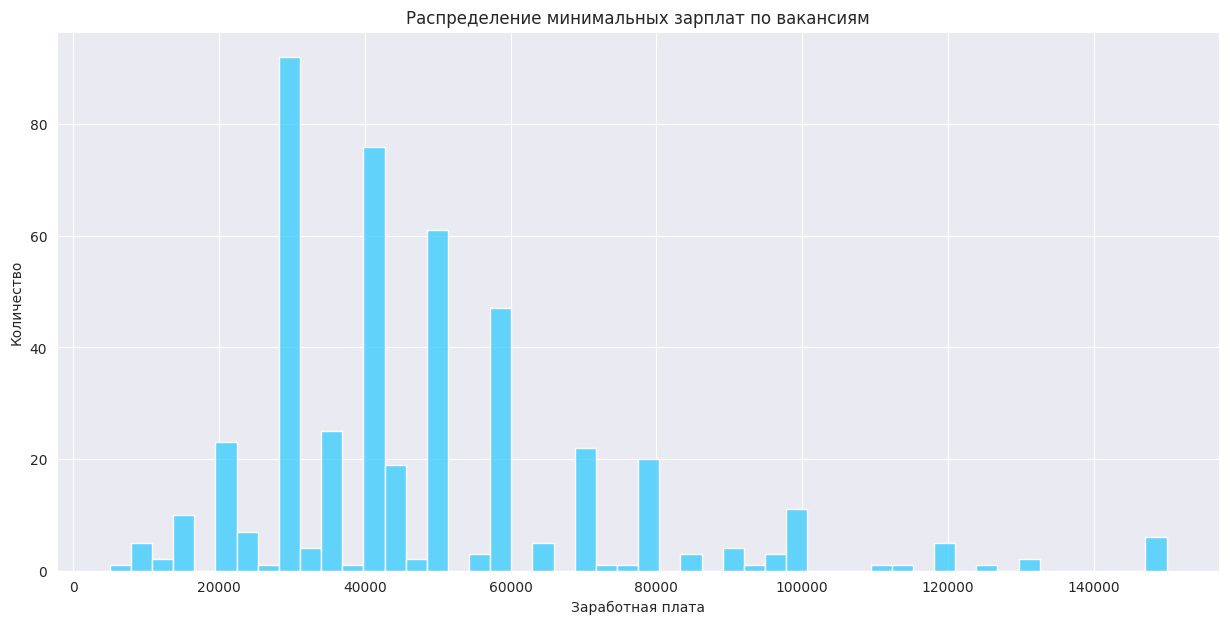

In [55]:
display(df.salary_from.describe())
plt.figure(figsize=(15, 7))
sns.histplot( df['salary_from'], bins=50,color='#33ccff')
plt.title('Распределение минимальных зарплат по вакансиям')
plt.xlabel('Заработная плата')
plt.ylabel('Количество')
ax = plt.gca()
plt.show()

**Медианная нижняя граница ЗП составляет 40.000. У 75% вакансий размещенных в КА заработная плата до 60.000**

count       370.000000
mean      76520.486486
std       40527.703032
min        1380.000000
25%       50000.000000
50%       70000.000000
75%      100000.000000
max      250000.000000
Name: salary_up_to, dtype: float64

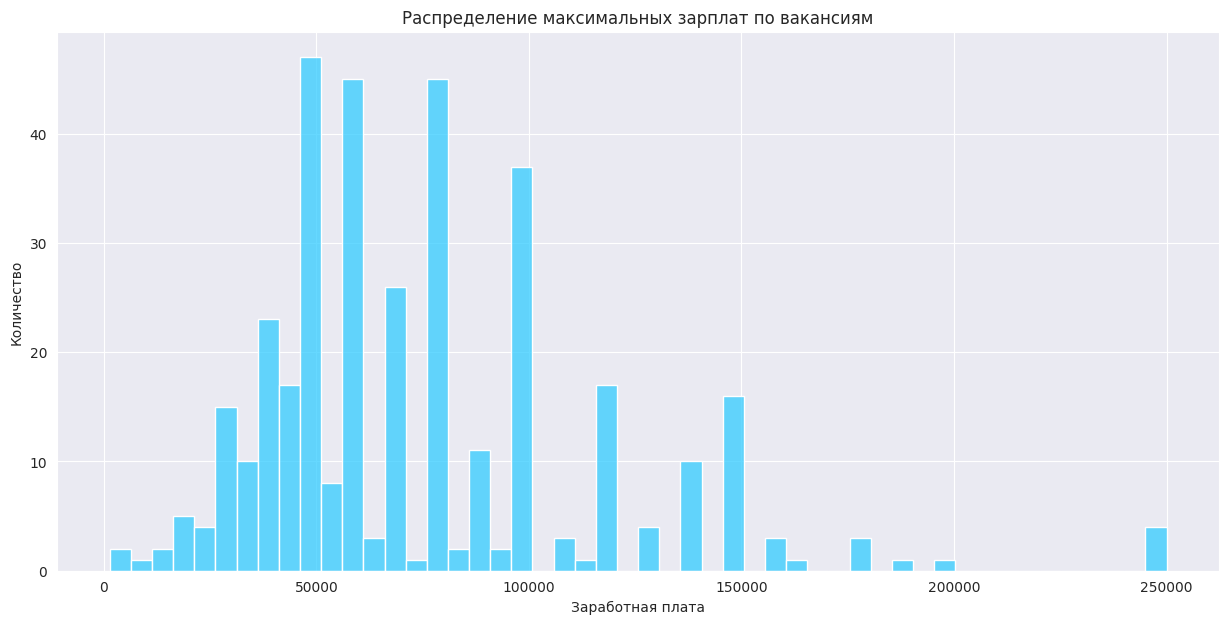

In [56]:
display(df.salary_up_to.describe())
plt.figure(figsize=(15, 7))
sns.histplot( df['salary_up_to'], bins=50,color='#33ccff')
plt.title('Распределение максимальных зарплат по вакансиям')
plt.xlabel('Заработная плата')
plt.ylabel('Количество')
ax = plt.gca()
plt.show()

**Медианная верхняя граница ЗП составляет 65.000. 75% вакансий размещенных в КА заработная плата до 100.000. Максимальная заработная плата указанная в вакансиях составляет 250.000 и это не единичная вакансия.**

In [57]:
city = df.copy()
city['city'] = city['city'].str.split(',')
city = city.explode('city')
city['city'] = city['city'].apply(lambda x: x.strip())
city_counts = city['city'].value_counts().reset_index().head(10)

In [58]:
city_counts

,city,count
0,Москва,964
1,Санкт-Петербург,195
2,Казань,35
3,Екатеринбург,25
4,Самара,20
5,Ростов-на-Дону,15
6,Нижний Новгород,14
7,Будва,13
8,Алматы,12
9,Тюмень,12


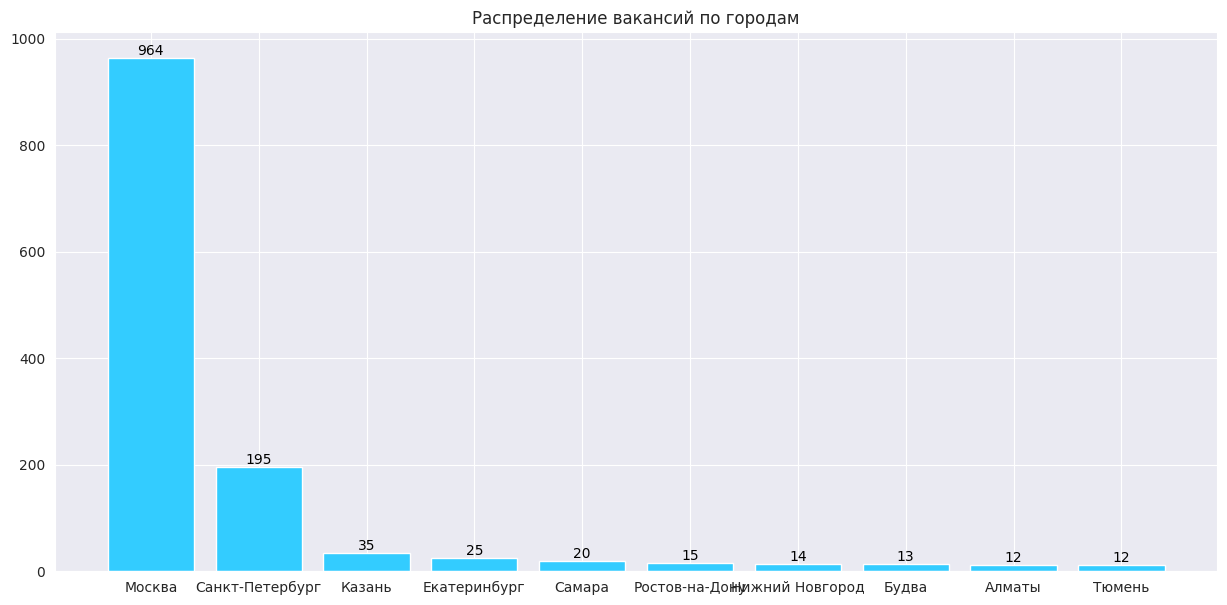

In [59]:
plt.figure(figsize=(15, 7))
plt.bar(city_counts['city'], city_counts['count'],color='#33ccff')

for x, y, tex in zip(city_counts['city'], city_counts['count'], city_counts['count']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black'})

plt.title('Распределение вакансий по городам')
plt.xticks(rotation=0)


plt.show()




**Самым популярным городом чаще всех остальных указываемый в вакансиях является Москва 964 упоминания, далее с большим отставанием идет Санкт-Петербург 195 упоминаний.**

**Отдельно можно отметить, что среди топ-10 городов по упоминанию в вакансиях присутствуют и иностранные города, такие как Будва(Черногория) и Алматы(Казахстан).**

In [60]:
df.work_format.value_counts()

work_format
Удаленка                  652
Офис, Гибрид              218
Офис, Гибрид, Удаленка    133
Офис                      106
Гибрид, Удаленка           99
Гибрид                     65
Офис, Удаленка             11
Name: count, dtype: int64

**Более половины вакансий предлагают удаленый формат работы, далее идут "офис, гибрид" 16.97% и "Офис, Гибрид, Удаленка" - 10.3%**

In [61]:
df.experience.value_counts()

experience
До 1 года опыта, возможен опыт в pet-проектах; без опыта    1180
До 1 года опыта, возможен опыт в pet-проектах                 76
Опыт от 1 года                                                26
Без опыта                                                      2
Name: count, dtype: int64

**В основном работодатели рассматривают кандидатов До 1 года опыта, с возможным опытом в pet-проектах либо без опыта. Столь размытые требования к опыту работы, можно объяснить тем, что работодатель готов расширить воронку откликов и самостоятельно отсеивать кандидатов на этапах тех.задания и собеседования.**

In [62]:
df.education.value_counts()

education
Другое, На смежных специальностях, Профильное    1240
На смежных специальностях, Профильное              42
Профильное                                          2
Name: count, dtype: int64

**Работодатели также лояльно относятся к полученному образованию, лишь 3% готовы рассматривать кандидатов только с профильным или смежным образованием.**

In [63]:
df.employment.value_counts()

employment
Полная                                                    774
Волонтерство, Полная, Проектная, Стажировка, Частичная     97
Стажировка                                                 82
Проектная, Частичная                                       59
Частичная                                                  42
Проектная                                                  40
Полная, Проектная, Частичная                               37
Полная, Частичная                                          33
Проектная, Стажировка, Частичная                           18
Полная, Стажировка                                         15
Полная, Проектная                                          15
Проектная, Стажировка                                      15
Стажировка, Частичная                                      13
Волонтерство, Проектная, Стажировка, Частичная              9
Волонтерство, Проектная, Стажировка                         7
Волонтерство, Стажировка, Частичная                        

**В формате занятости больше половины(60.28%) вакансий требуют только полной занятости. На втором месте идет Волонтерство, Полная, Проектная, Стажировка, Частичная, то есть работодатель готов рассматривать кандидата на любой формат работы, таких вакансий 7.55%. Стажировка находится на третьем месте на неё приходится 6.38% вакансий.**

In [64]:
df.design_format.value_counts()

design_format
ГПХ, ИП, Контракт, Самозанятость, Трудовой договор    484
Трудовой договор                                      334
Самозанятость                                         132
Контракт                                               70
ИП, Самозанятость                                      58
ГПХ, ИП, Контракт, Самозанятость                       57
Самозанятость, Трудовой договор                        21
ГПХ                                                    20
ГПХ, ИП, Самозанятость                                 15
ИП, Самозанятость, Трудовой договор                    14
ГПХ, Трудовой договор                                  13
ГПХ, Самозанятость                                     12
Контракт, Трудовой договор                             11
ИП, Контракт, Самозанятость                             7
ГПХ, Контракт, Трудовой договор                         6
ГПХ, Контракт                                           6
ГПХ, ИП, Самозанятость, Трудовой договор                5


**В формате оформления пресутсвуют большое разнообразие. Большей частью работодатели рассматривают любой формат оформления 37.69%, далее Трудовой договор — 26%, Самозанятость — 10% вакансий и Контракт — 5%.**

link_to_test
нет    1178
да      106
Name: count, dtype: int64

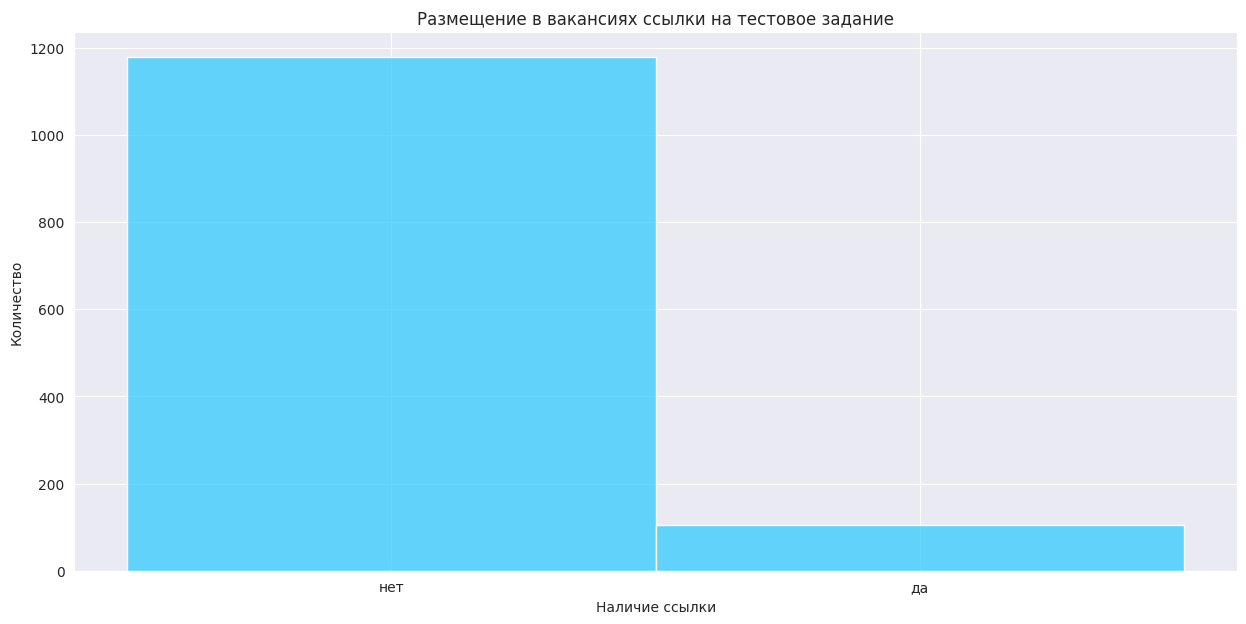

In [65]:
display(df['link_to_test'].value_counts())
plt.figure(figsize=(15, 7))
sns.histplot( df['link_to_test'],color='#33ccff')
plt.title('Размещение в вакансиях ссылки на тестовое задание')
plt.xlabel('Наличие ссылки')
plt.ylabel('Количество')
ax = plt.gca()
plt.show()

**В основном ссылки к тестовым заданиям не прикрепляются к вакансиям, только в 8.25% вакансий есть ссылка. Возможно, пользователи получают тестовое задание позже в мессенджерах, после разговора с HR менеджером.**

Ключевыми метриками популярности вакансии являются просмотры и клики, рассмотрим средние показатели в разрезе статуса вакансии

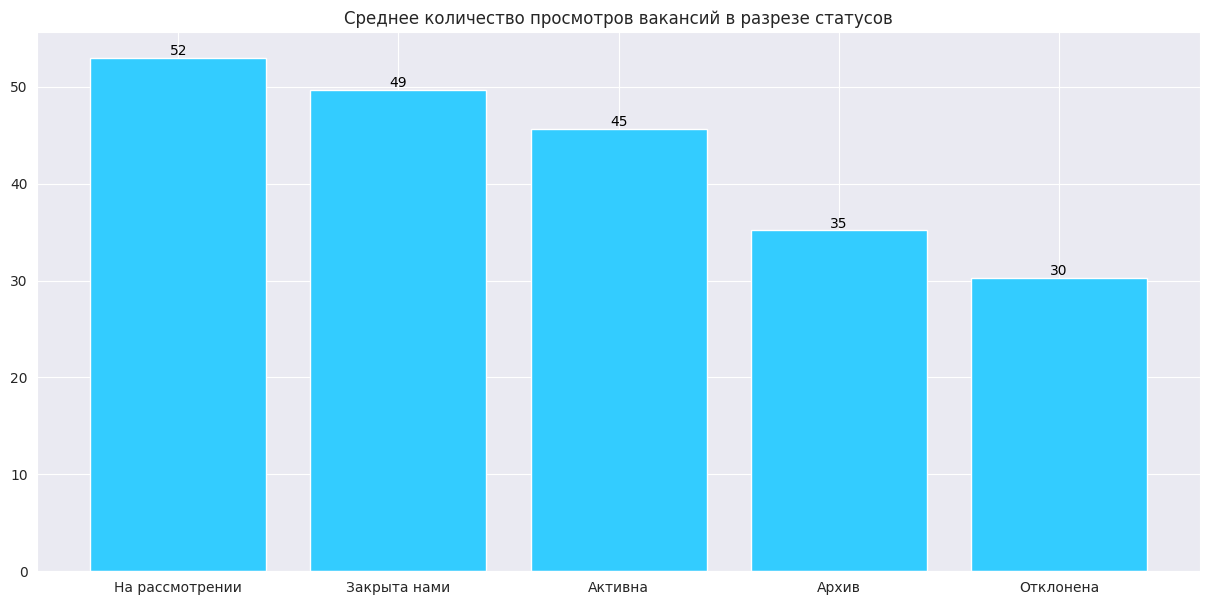

In [66]:
views = df.groupby('status')['views'].mean().reset_index().sort_values('views',ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(views['status'], views['views'],color='#33ccff')

for x, y, tex in zip(views['status'], views['views'], views['views']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black'})

plt.title('Среднее количество просмотров вакансий в разрезе статусов')
plt.xticks(rotation=0)


plt.show()

**Самые высокие показатели у вакансий со статусами: "На рассмотрении", "Закрыта нами" и "Активная". Самый низкий показатель у вакансий, которые отказались от услуг агентства.**

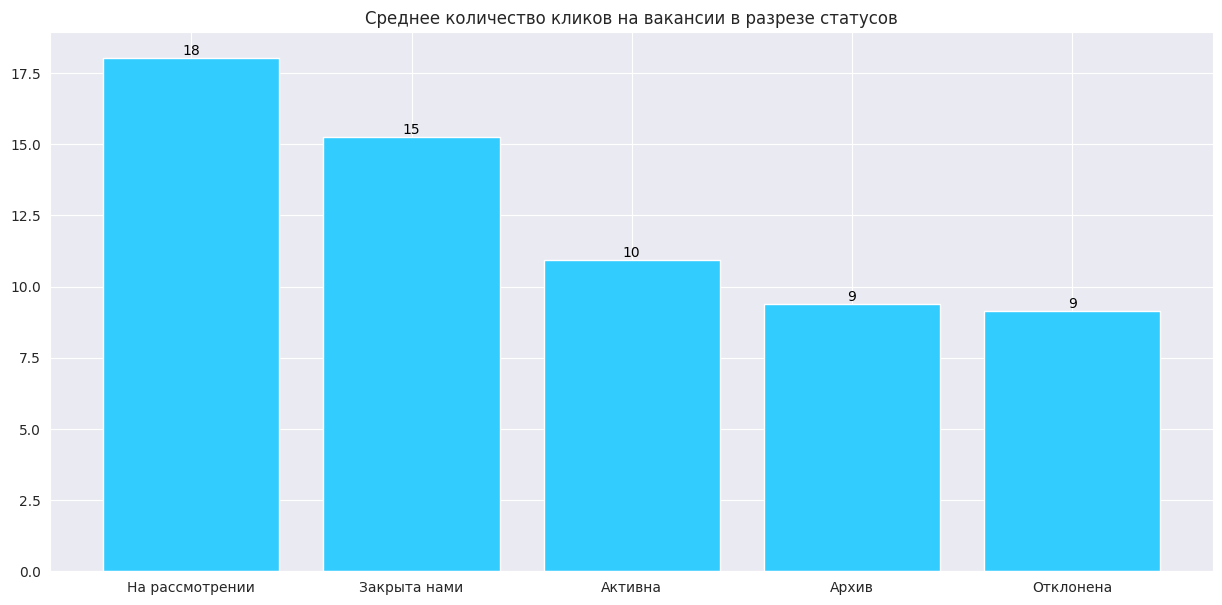

In [67]:
responses = df.groupby('status')['responses'].mean().reset_index().sort_values('responses',ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(responses['status'], responses['responses'],color='#33ccff')

for x, y, tex in zip(responses['status'], responses['responses'], responses['responses']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black'})

plt.title('Среднее количество кликов на вакансии в разрезе статусов')
plt.xticks(rotation=0)


plt.show()

**Здесь наблюдается аналогичное выстраивание графика, как и с просмотрами, но наблюдается меньшая разница между статусами. Так разница между вакансиями "Активна" и "Отклонена" составляет один клик.**

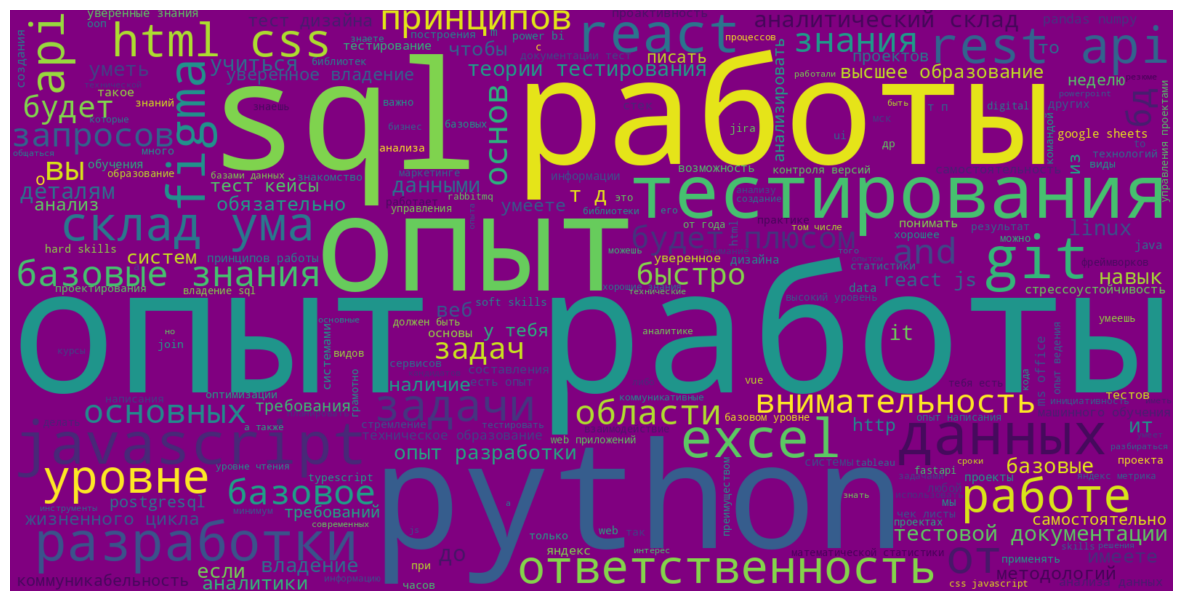

In [68]:
STOPWORDS=['и','с','для','ты','как','не','по','на','их','что','в','или',
                 'к','Знание','Умение','понимание','работать','навыки','готовность',
                 'желание','способность','развиваться','Работа','команде']
word_string=" ".join(df.query('responses>12')['main_requirements'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,max_words = 250,background_color="purple",max_font_size= 300,  width=1600, height=800).generate(word_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')
plt.show()

**Больше всего в основных требованиях к вакансии указывается опыт работы и умение использовать различные языки программирование и инструменты.**

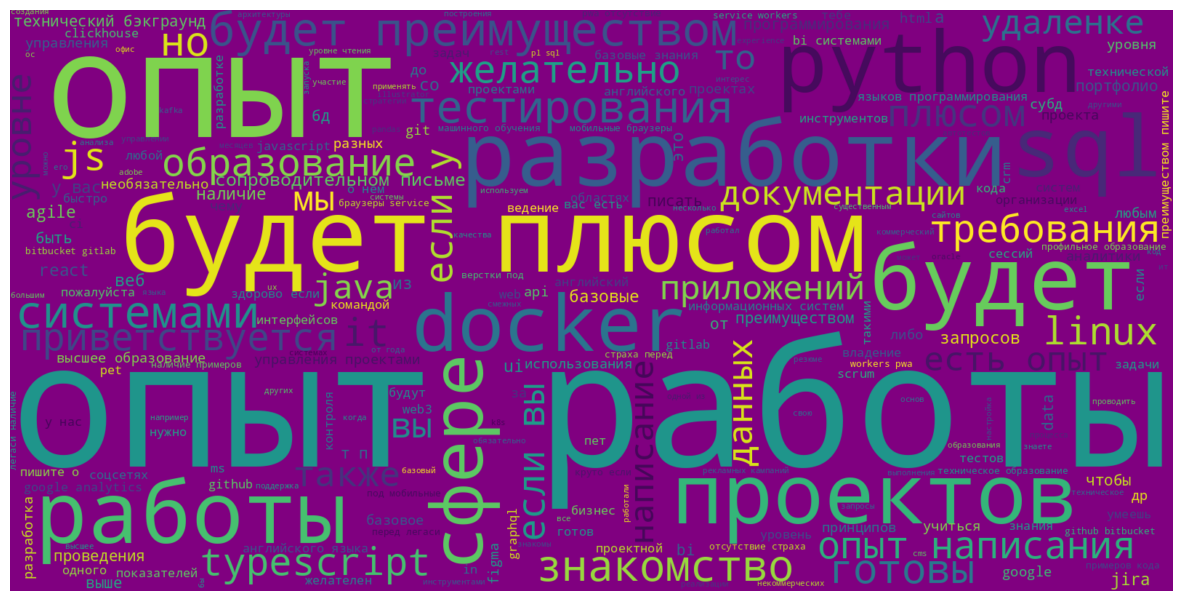

In [69]:
word_string=" ".join(df.query('responses>12 and ~(add_requirements.isna())')['add_requirements'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,max_words = 250,background_color="purple",max_font_size= 300,  width=1600, height=800).generate(word_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')
plt.show()

**В дополнительных требованиях также уделяется внимание к опыту работы и инструментам. Ещё добавились такие требования, как сопроводительное письмо, портфолио и образование.**

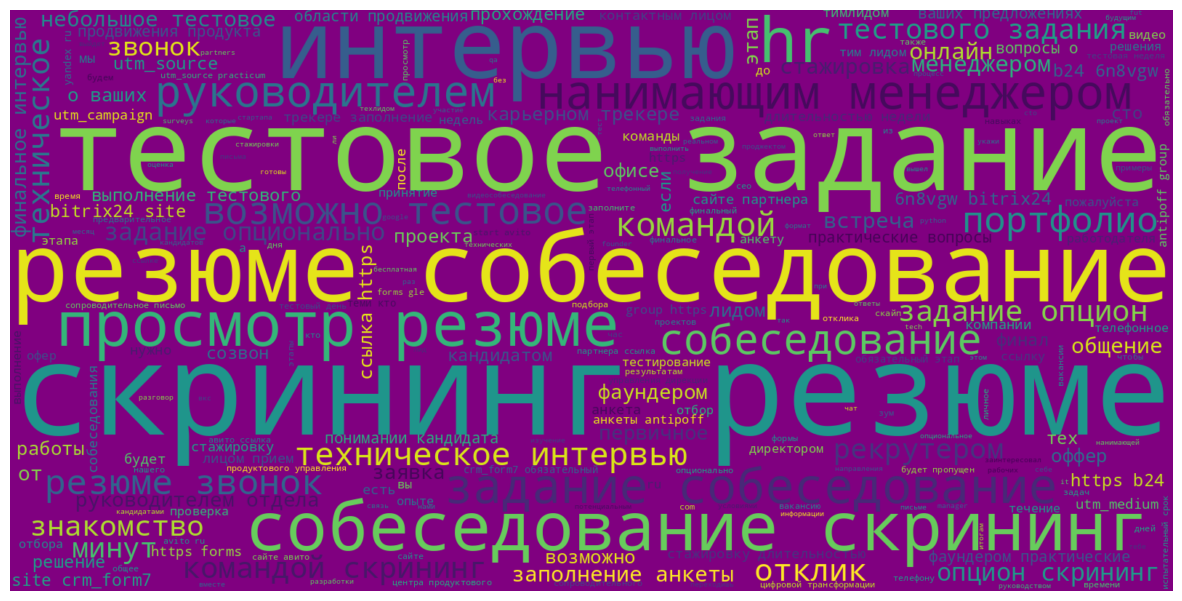

In [70]:
word_string=" ".join(df.query('responses>12 and ~(selection_stages.isna())')['selection_stages'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,max_words = 250,background_color="purple",max_font_size= 300,  width=1600, height=800).generate(word_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')
plt.show()

Этапы отбора включают:

* Скрининг резюме
* тестовое задание
* Собеседование с hr или руководителем



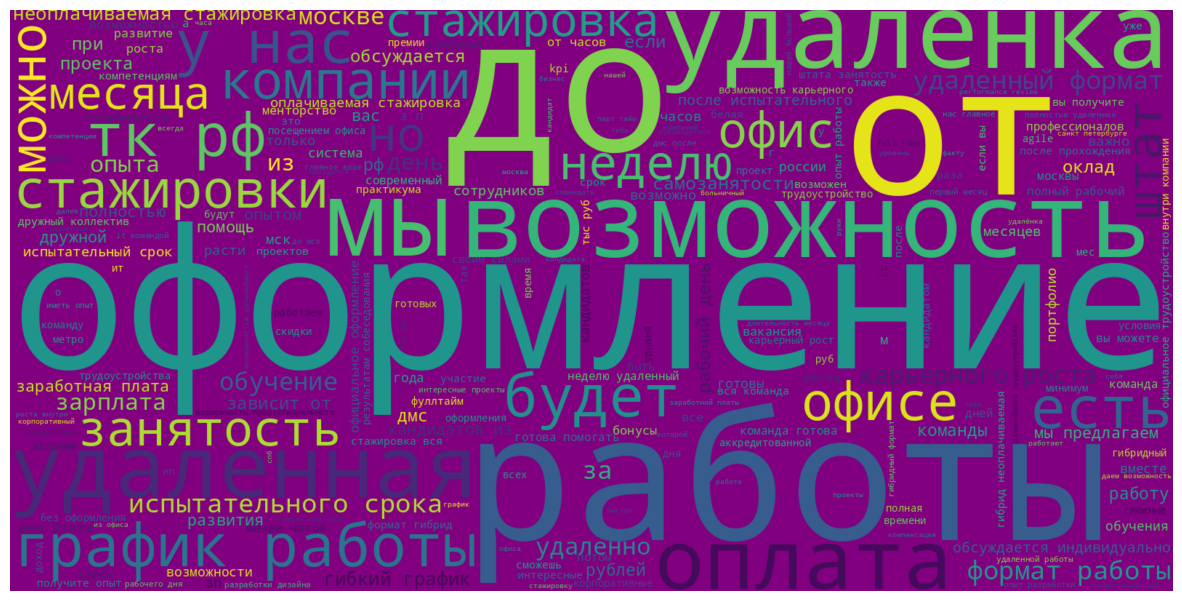

In [71]:
word_string=" ".join(df.query('responses>20 and ~(conditions.isna())')['conditions'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,max_words = 250,background_color="purple",max_font_size= 300,  width=1600, height=800).generate(word_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')
plt.show()

**В условиях работы чаще фигурируют удаленный формат работы оформление по ТК РФ и уровень заработной платы (от и до).**

Посчитаем CTR или показатель кликабельности вакансий. CTR = количество кликов / количество показов × 100%

In [72]:
df['CTR'] = round(df['responses'] /df['views']*100,2)
ctr = df.groupby('status')['CTR'].mean().reset_index()
ctr.sort_values('CTR',ascending=False)

,status,CTR
3,На рассмотрении,35.756444
2,Закрыта нами,34.834812
1,Архив,33.488488
4,Отклонена,32.276571
0,Активна,30.939559


**Самый высокий показатель кликабельности у вакансий "На рассмотрении" - 35.75%. Самый низкий у вакансий со статусом "Активна" -30.93%.**

## Генерация новых признаков

Создадим новые столбцы с данными для дальнейшего анализа.

Создадим столбец с наличием или отсутствием дополнительных требований.

In [73]:
df['add_req_on'] = np.where((~df['add_requirements'].isnull()), 'да', 'нет')
df.add_req_on.value_counts()

add_req_on
да     659
нет    625
Name: count, dtype: int64

Чуть больше половины работодателей указывают дополнительные требования к вакансиям.

Создадим столбец с количеством городов указанных в вакансии

In [74]:
df['count_city'] = df['city'].apply(lambda x: x.count(',') + 1)
df.count_city.value_counts()

count_city
1     1174
2       75
3       19
5        4
6        4
4        4
11       1
24       1
9        1
21       1
Name: count, dtype: int64

В большинстве вакансий указывается один город, в 5% вакансий указано два города. Бывают и очень большое количество городов более 20.

Создадим столбцы с наличием или отсутствием в вакансиях городов Москва и Санк-Петербург

In [75]:
df['is_moscow'] = df['city'].str.contains('Москва').astype(int)
df['is_saint_petersburg'] = df['city'].str.contains('Санкт-Петербург').astype(int)

Создадим столбец с количеством дней потребовавшимся для закрытия вакансии.

In [76]:
df['days_difference'] = (df['closing_date'] - df['publication_date']).dt.days
df['days_difference'] = np.where(df['days_difference'] == 0, 1, df['days_difference'])
df.days_difference.describe()

count    1127.000000
mean       45.329193
std        40.601307
min         1.000000
25%        19.000000
50%        34.000000
75%        58.000000
max       294.000000
Name: days_difference, dtype: float64

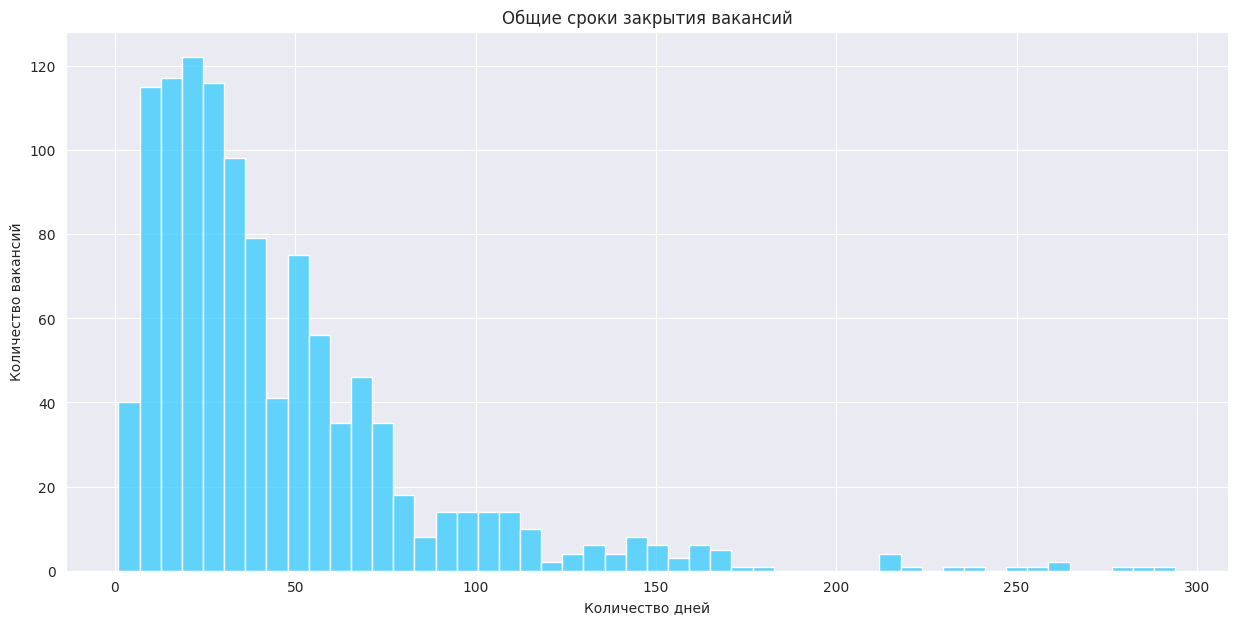

In [77]:
plt.figure(figsize=(15, 7))
sns.histplot( df['days_difference'], bins=50,color='#33ccff')
plt.title('Общие сроки закрытия вакансий')
plt.xlabel('Количество дней')
plt.ylabel('Количество вакансий')
ax = plt.gca()
plt.show()

**В среднем вакансии закрываются за 45 дней. 75% вакансий закрываются за 58 дней. Максимальное закрытие вакансии составило 294 дня.**

count    320.000000
mean      40.321875
std       38.669075
min        1.000000
25%       15.000000
50%       29.000000
75%       50.000000
max      282.000000
Name: days_difference, dtype: float64

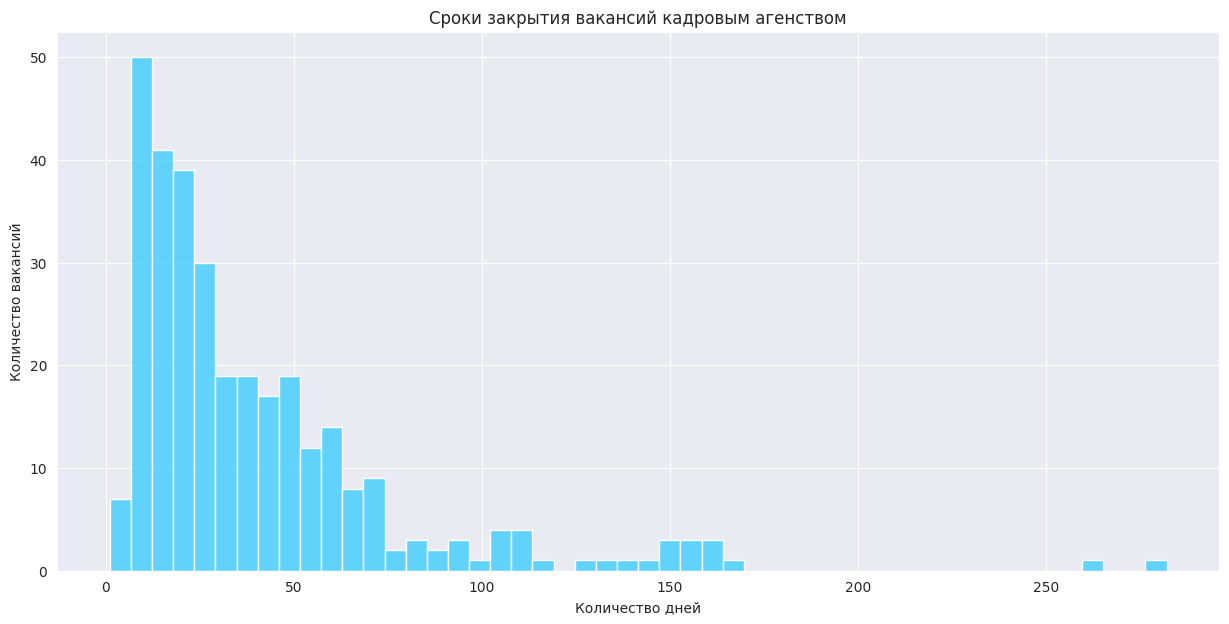

In [78]:
display(df.query('status=="Закрыта нами"')['days_difference'].describe())
plt.figure(figsize=(15, 7))
sns.histplot( df.query('status=="Закрыта нами"')['days_difference'], bins=50,color='#33ccff')
plt.title('Сроки закрытия вакансий кадровым агенством')
plt.xlabel('Количество дней')
plt.ylabel('Количество вакансий')
ax = plt.gca()
plt.show()

**В среднем вакансии кадровым агентством закрываются за 40 дней. 75% вакансий закрываются за 50 дней. Максимальное закрытие вакансии составило 282 дня.**

Создадим колонку с месяцем публикации.

In [79]:
df['publication_month'] = df['publication_date'].dt.to_period('M').dt.to_timestamp().dt.strftime('%m').astype(str).str.replace('^0', '', regex=True).astype(int)

Созадим два столбца с проверкой наличия зарплатной вилки в вакансиях.

In [80]:
df['salary_from_on'] = np.where((~df['salary_from'].isnull()), 1, 0)
df['salary_up_to_on'] = np.where((~df['salary_up_to'].isnull()), 1, 0)

Создадим столбец с данными о возможности работать удаленно

In [81]:
df['remote_work'] = df['work_format'].str.contains('Удаленка').astype(int)

## Вывод

**На этапе исследовательского анализа выявлено следующие:**



1.  Наибольшее количество вакансий находится в архиве 54.59%. 24.92% закрыты нами, отклонено 8.17% заявок.
2.  Больше всего клиентов получено из повторных обращений, на них приходится 39.8%.
3.  Больше всего размещения вакансий приходится на лето. Также популярны март и апрель, меньше всего размещений приходится на зимние месяцы.
4.  Самым популярными месяцами по количеству просмотров вакансий стали:август, сентябрь, апрель, июль.
5.  Самым популярными месяцами по количеству откликов на вакансию стали: август, октябрь, сентябрь, июль.
6.  Больше всего вакансии закрываются по средствам переноса их в архив.
7.  Максимальное число закрытых вакансий силами HR агентства составило — 41 вакансия в сентябре. От начала года до середины марта количество отклонённых вакансий превышало количество закрытых силами агентства.
8.  Медианная нижняя граница ЗП составляет 40.000. У 75% вакансий размещенных в HR агентстве заработная плата до 60.000 рублей.
9.  Медианная верхняя граница ЗП составляет 65.000. 75% вакансий размещенных в HR агентстве заработная плата до 100.000.
10. Самым популярным городом чаще всех остальных указываемый в вакансиях является Москва 964 упоминания, далее с большим отставанием идет Санкт-Петербург 195 упоминаний.
11. Более половины вакансий предлагают удаленный формат работы.
12. В основном работодатели рассматривают кандидатов До 1 года опыта, с возможным опытом в pet-проектах либо без опыта.
13. Самый высокий средний показатель кликабельности у вакансий "На рассмотрении" - 35.75%. Самый низкий у вакансий со статусом "Активна" -30.93%. У вакансий "Закрыта нами" он составил — 34.83%.
14. В среднем вакансии закрываются за 45 дней. 75% вакансий закрываются за 58 дней.
15. В среднем вакансии кадровым агентством закрываются за 40 дней. 75% вакансий закрываются за 50 дней.

Также созданы новые столбцы для проведения дальнейшего анализа.


# Построение воронки закрытия вакансии

In [82]:
data = {'name':['Количество вакансий','Количество вакансий с более 1 просмотра','Количество вакансий с более 1 клика','Количество вакансий закрытых нами']}
df_new = pd.DataFrame(data)
df_new['count'] = df_new['name'].apply(lambda x: df.id.count() if x == 'Количество вакансий'
                                             else df.query('views > 0').views.count() if x == 'Количество вакансий с более 1 просмотра'
                                             else df.query('responses>0').responses.count() if x == 'Количество вакансий с более 1 клика'
                                             else df.query('status=="Закрыта нами" and views>0 and responses>0')['status'].count())
df_new['count_%'] =round(df_new['count'] / df.id.count()*100,2)
df_new

,name,count,count_%
0,Количество вакансий,1284,100.00
1,Количество вакансий с более 1 просмотра,1284,100.00
2,Количество вакансий с более 1 клика,1284,100.00
3,Количество вакансий закрытых нами,320,24.92


Воронка вакансий выглядит следующим образам, сначала работодатель размещают вакансию, далее идут просмотры вакансии потенциальными работниками, потом они откликаются на собеседование, если вакансиях их заинтересовала и если компания и потенциальный работник сходятся и происходит трудоустройство, то вакансия закрывается HR агентством.

Наглядное представление цепочки событий:

**Размещение вакансии → Просмотры вакансии → Отклики на собеседование → Устройство на работу и закрытие вакансии со статусом "Закрыта нами"**

In [83]:
fig = go.Figure(go.Funnel(
    y = df_new['name'],
    x = df_new['count'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["skyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "wheat", "wheat", "wheat"]}},
    connector = {"line": {"width": 3}})
    )
fig.update_layout(title_text='Воронка закрытия вакансии',xaxis=dict(domain=[0.1, 0.6]))
fig.show()

Из воронки закрытия вакансий видно, что имеющиеся вакансии в датасете успешно проходят путь от размещения вакансии до откликов на неё, но только 25% вакансий были успешно закрыты нами.

# Выдвижение гипотез и их опровержение / проверка

## Корреляция

Преобразуем категориальные значения методом "порядковой кодировки". Построим корреляцию между колонками и оценим связь по шкале Чеддока.

Она определяет тесноту связи следующим образом:
   

*   0 – полное отсутствие связи;
*   0 – 0.3 – слабая;
*   0.3 – 0.5 – умеренная;
*   0.5 – 0.7 – заметная;
*   0.7 – 0.9 – высокая;
*   0.9 – 1 – весьма высокая.
  

Для дальнейшего анализа необходимо установить с какими столбцами мы будем производить корреляцию и какой вид переменных представленных в них:

Название столбца	|  Вид переменной
*   status —	Номинальные категориальные
*   source —	Номинальные категориальные
*   views —	Дискретная
*   responses —	Дискретная
*   salary_from —	Дискретная
*   salary_up_to —	Дискретная
*   design_format —	Номинальные категориальные
*   work_format —	Номинальные категориальные
*   experience —	Номинальные категориальные
*   education —	Номинальные категориальные
*   employment —	Номинальные категориальные
*   link_to_test —	Бинарная категориальная
*   add_req_on —	Бинарная категориальная
*   count_city —	Дискретная
*   is_moscow —	Бинарная категориальная
*   is_saint_petersburg —	Бинарная категориальная
*   days_difference —	Дискретная
*   publication_month —	Номинальные категориальные
*   salary_from_on —	Бинарная категориальная
*   salary_up_to_on —	Бинарная категориальная
*   remote_work —	Бинарная категориальная

Так как нас интересует увеличение количества просмотров и откликов, то будем смотреть как данные столбцы коррелируются с остальными, для этого будут использоваться следующие методы:

*   Дискретная - Номинальная категориальная: коэффициент V Крамера
*   Дискретная - Бинарная категориальная: коэффициент Хи-квадрат
*   Дискретная - Дискретная: коэффициент корреляции Пирсона или коэффициент Спирмена, в зависимости от распределения.










Преобразуем данные столбцов в числовой вид с помощью функции и применим необходимые методы.

In [84]:
df_corr = df.copy()

In [85]:
def order_encode(column):
    # Преобразуем значения в Categorical
    categorical = pd.Categorical(column)

    # Факторизуем значения
    factorized, order = pd.factorize(categorical.codes)

    return factorized

In [86]:
for column in df_corr.columns:
    if df_corr[column].dtype == 'object':
        df_corr[column] = order_encode(df[column])

Построим графики по столбцам с дискретными переменными для выяснения распределения и дальнейшего выбора метода корреляции.

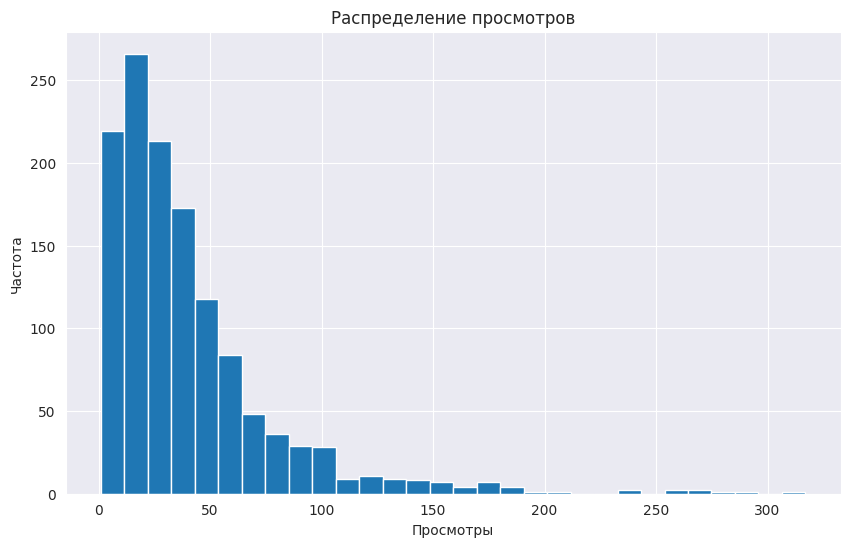

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(df['views'], bins=30)
plt.title('Распределение просмотров')
plt.xlabel('Просмотры')
plt.ylabel('Частота')
plt.show()

На графике наблюдается правоскошенное распределение. Лучше использовать коэффициент Спирмена.

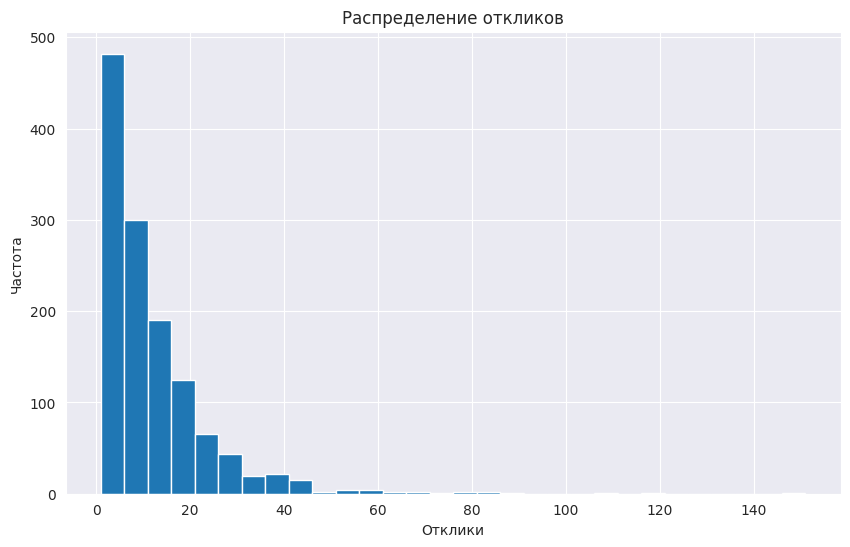

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(df['responses'], bins=30)
plt.title('Распределение откликов')
plt.xlabel('Отклики')
plt.ylabel('Частота')
plt.show()

Так же как и с просмотрами вакансий лучше использовать Коэффициент Спирмена.

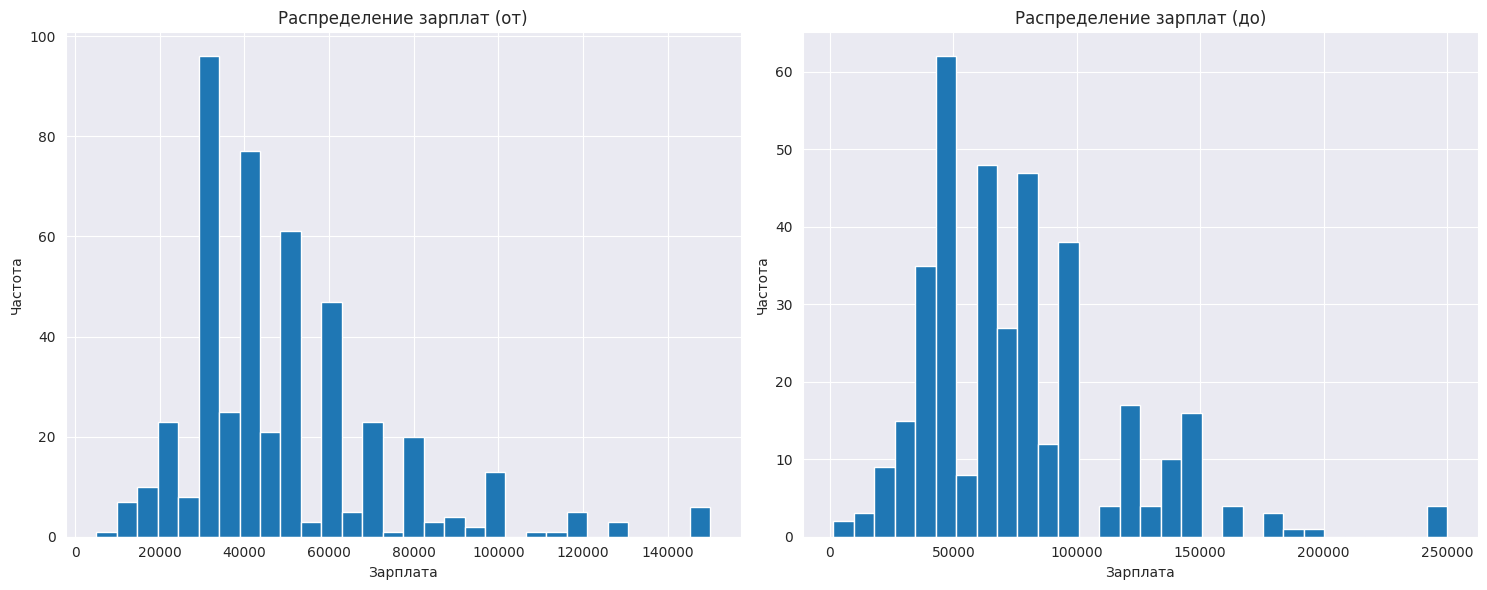

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].hist(df['salary_from'], bins=30)
axs[0].set_title('Распределение зарплат (от)')
axs[0].set_xlabel('Зарплата')
axs[0].set_ylabel('Частота')

axs[1].hist(df['salary_up_to'], bins=30)
axs[1].set_title('Распределение зарплат (до)')
axs[1].set_xlabel('Зарплата')
axs[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Данные зарплат распределены не нормально нужно использовать коэффициент Спирмена.

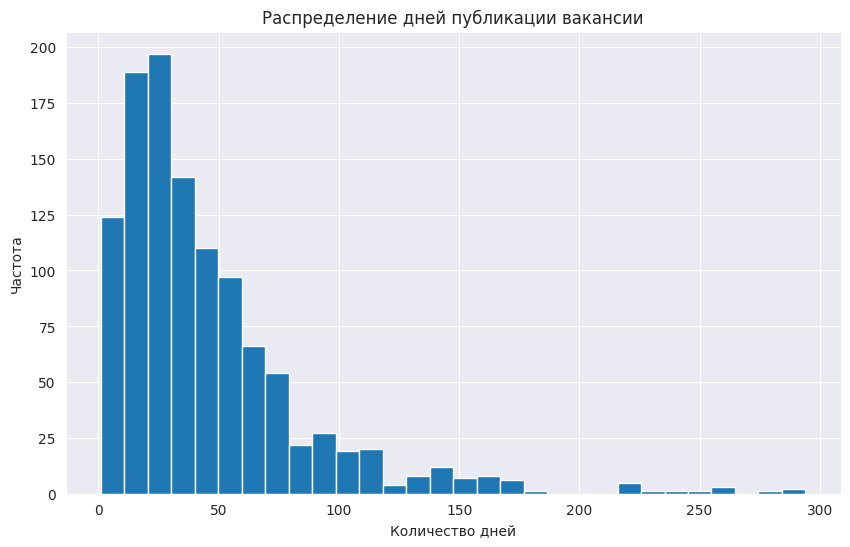

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(df['days_difference'], bins=30)
plt.title('Распределение дней публикации вакансии')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

На графике наблюдается правоскошенное распределение. Лучше использовать коэффициент Спирмена.

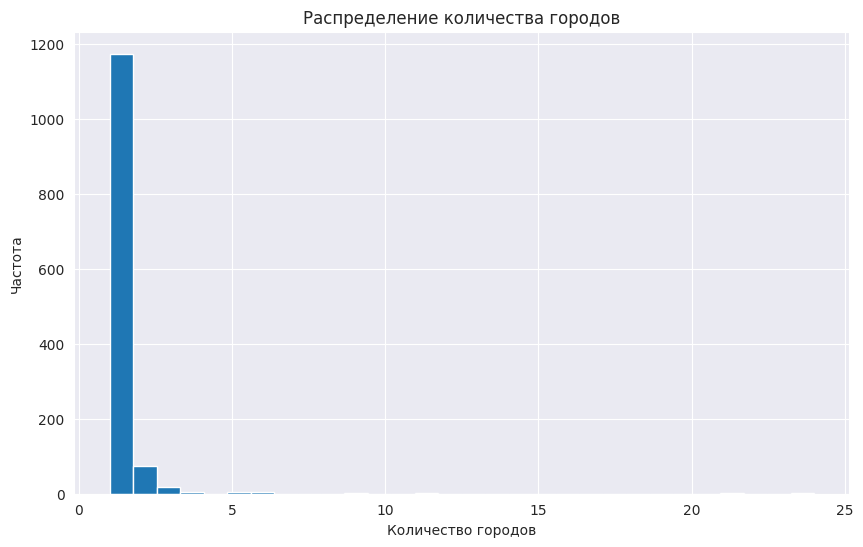

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(df['count_city'], bins=30)
plt.title('Распределение количества городов')
plt.xlabel('Количество городов')
plt.ylabel('Частота')
plt.show()

Почти все вакансии имеют один город, наблюдается длинный хвост более 20 городов, необходимо использовать коэффициент Спирмена.

In [92]:
corr_matrix = round(df_corr[['views', 'responses', 'salary_from', 'salary_up_to', 'count_city', 'days_difference']].corr(method='spearman'),2)

Построим диаграмму корреляции

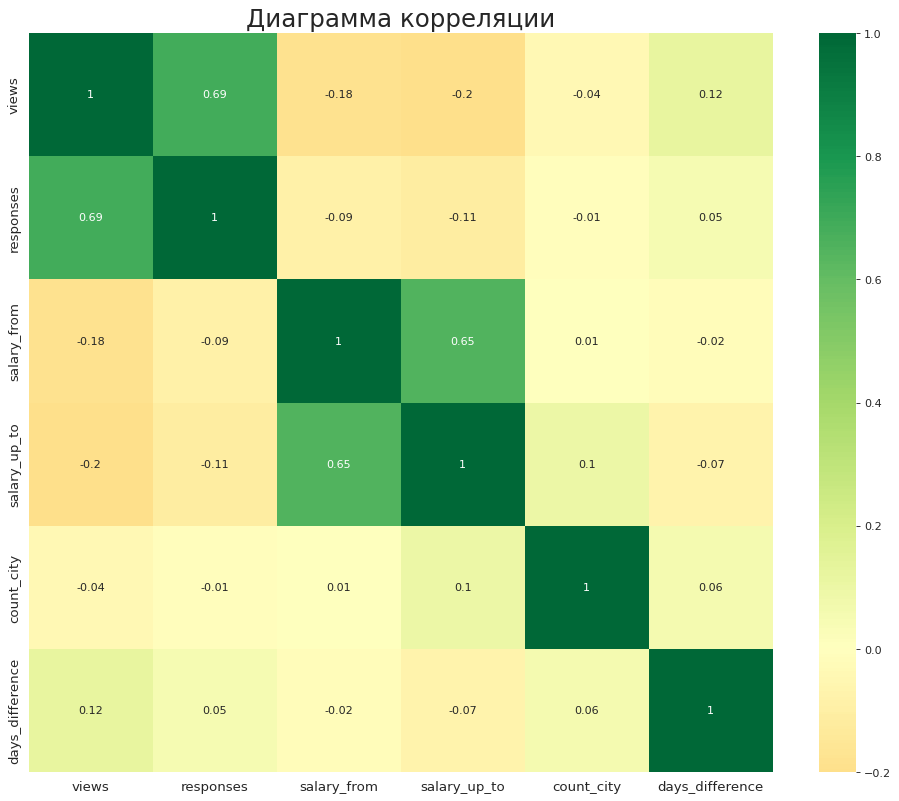

In [93]:
plt.figure(figsize=(15,12), dpi= 80)
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Наблюдается заметная связь между просмотрами и кликами, зарплата от и зарплата до.**

**По остальным столбцам нет заметной корреляции.**

In [94]:
nominal_category = ['status','source','design_format', 'work_format', 'experience', 'education', 'publication_month']
result_dict = {}
def calculate_v_cramer(df, column):
    contingency_table = pd.crosstab(df['views'], df[column])

    # Вычисление хи-квадрат и p-value
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Расчет коэффициента V Крамера
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    v_cramer = np.sqrt(chi2 / (n * k))

    return v_cramer, p

for per in nominal_category:
    result = calculate_v_cramer(df, per)
    result_dict[per] = result

print("Коэффициенты V Крамера для каждого столбца из списка номинальных категориальных переменных и столбца просмотров:")
for per, (value, p_value) in result_dict.items():
    print(f"{per}: V Крамера = {value}, p-value = {p_value}")

Коэффициенты V Крамера для каждого столбца из списка номинальных категориальных переменных и столбца просмотров:
status: V Крамера = 0.3866552796959772, p-value = 0.00010589747890953337
source: V Крамера = 0.3511009319049746, p-value = 0.4894496685044542
design_format: V Крамера = 0.3653299835156758, p-value = 2.8776846043328535e-05
work_format: V Крамера = 0.3483763754693932, p-value = 0.5581185263546817
experience: V Крамера = 0.25880485280800186, p-value = 1.0
education: V Крамера = 0.24937742653068395, p-value = 0.9999999999999837
publication_month: V Крамера = 0.3560499314915425, p-value = 0.14025612083573105


**Наблюдается умеренная взаимосвязь между количеством просмотров и источником, форматом трудоустройства, форматом работы и месяцем публикации вакансии.**

**Но высокое p_value у источника, формат работы и месяц публикации говорит о том, что это значение не является статистически значимым. Следовательно, на основании данного результата нельзя делать однозначных выводов о наличии зависимости между столбцом количество просмотров и данными столбцами.**

In [95]:
nominal_category = ['status', 'source', 'design_format', 'work_format', 'experience', 'education', 'publication_month']
result_dict = {}

def calculate_v_cramer(df, column):
    contingency_table = pd.crosstab(df['responses'], df[column])

    # Вычисление хи-квадрат и p-value
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Расчет коэффициента V Крамера
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    v_cramer = np.sqrt(chi2 / (n * k))

    return v_cramer, p

for per in nominal_category:
    result = calculate_v_cramer(df, per)
    result_dict[per] = result

print("Коэффициенты V Крамера и p-value для каждого столбца из списка номинальных категориальных переменных и столбца откликов:")
for per, (value, p_value) in result_dict.items():
    print(f"{per}: V Крамера = {value}, p-value = {p_value}")

Коэффициенты V Крамера и p-value для каждого столбца из списка номинальных категориальных переменных и столбца откликов:
status: V Крамера = 0.2755259027197645, p-value = 5.4335530964452916e-08
source: V Крамера = 0.23772830231281014, p-value = 0.08667875911497298
design_format: V Крамера = 0.1903524511625144, p-value = 0.9999999999999999
work_format: V Крамера = 0.23753335627619265, p-value = 0.02327419550980657
experience: V Крамера = 0.176249663532399, p-value = 0.999978787005883
education: V Крамера = 0.13625870324120964, p-value = 0.9999999999791498
publication_month: V Крамера = 0.22926933810200784, p-value = 0.09426180622059235


**Значимых корреляций между количеством откликов и другими столбцами не обнаружено. Наблюдается только слабая взаимосвязь.**

In [96]:
binary_category = ['link_to_test','add_req_on','is_moscow', 'is_saint_petersburg', 'salary_from_on', 'salary_up_to_on', 'remote_work']
result_dict = {}
def calculate_chi_square(df, column):
  contingency_table = pd.crosstab(df_corr['views'], df_corr[column])

  chi2, p, _, _ = chi2_contingency(contingency_table)
  return chi2, p
for per in binary_category:
    result = calculate_chi_square(df, per)
    result_dict[per] = result

print("Коэффициенты Хи-квадрат и p-value для каждого столбца из списка бинарных категориальных переменных и столбца просмотров:")
for per, (value, p_value) in result_dict.items():
    print(f"{per}: Коэффициент Хи-квадрат = {value}, p-value = {p_value}")

Коэффициенты Хи-квадрат и p-value для каждого столбца из списка бинарных категориальных переменных и столбца просмотров:
link_to_test: Коэффициент Хи-квадрат = 349.85351776689464, p-value = 9.888571154446568e-17
add_req_on: Коэффициент Хи-квадрат = 152.9024923225548, p-value = 0.5775237171417175
is_moscow: Коэффициент Хи-квадрат = 138.40871722512037, p-value = 0.8544428246557352
is_saint_petersburg: Коэффициент Хи-квадрат = 160.6569774535513, p-value = 0.40425236030061273
salary_from_on: Коэффициент Хи-квадрат = 172.42334467178392, p-value = 0.18922589914385382
salary_up_to_on: Коэффициент Хи-квадрат = 178.28655460190285, p-value = 0.11739073190096858
remote_work: Коэффициент Хи-квадрат = 225.48119660420838, p-value = 0.00028088560235532093


**Признаки link_to_test и remote_work имеют статистически значимую корреляцию с количеством просмотров объявлений, так как их коэффициенты Хи-квадрат значительно отличаются от 0, а p-value близко к 0.**

**Таким образом, можно сказать, что только признаки link_to_test и remote_work имеют корреляцию с количеством просмотров объявлений, в то время как остальные признаки не имеют существенной взаимосвязи.**

In [97]:
binary_category = ['link_to_test','add_req_on','is_moscow', 'is_saint_petersburg', 'salary_from_on', 'salary_up_to_on', 'remote_work']
result_dict = {}
def calculate_chi_square(df, column):
  contingency_table = pd.crosstab(df_corr['responses'], df_corr[column])

  chi2, p, _, _ = chi2_contingency(contingency_table)
  return chi2, p
for per in binary_category:
    result = calculate_chi_square(df, per)
    result_dict[per] = result

print("Коэффициенты Хи-квадрат и p-value для каждого столбца из списка бинарных категориальных переменных и столбца количества кликов:")
for per, (value, p_value) in result_dict.items():
    print(f"{per}: Коэффициент Хи-квадрат = {value}, p-value = {p_value}")

Коэффициенты Хи-квадрат и p-value для каждого столбца из списка бинарных категориальных переменных и столбца количества кликов:
link_to_test: Коэффициент Хи-квадрат = 65.93648079663353, p-value = 0.3756769960093942
add_req_on: Коэффициент Хи-квадрат = 86.52758337279079, p-value = 0.02630108812823546
is_moscow: Коэффициент Хи-квадрат = 75.87272169825675, p-value = 0.12811725270533317
is_saint_petersburg: Коэффициент Хи-квадрат = 87.38238347546962, p-value = 0.02276504307422277
salary_from_on: Коэффициент Хи-квадрат = 54.68911607303738, p-value = 0.7628794537699282
salary_up_to_on: Коэффициент Хи-квадрат = 71.09736107704613, p-value = 0.22620027261663078
remote_work: Коэффициент Хи-квадрат = 113.7255628976917, p-value = 9.483425126236865e-05


**Из результатов коэффициента Хи-квадрат и p-value можно сделать вывод, что колонки "add_req_on", "is_saint_petersburg" и "remote_work" имеют статистически значимую корреляцию с количеством откликов.**

**Остальные колонки, такие как "link_to_test", "is_moscow", "salary_from_on" и "salary_up_to_on", не показывают такой выраженной связи с количеством откликов, поскольку их коэффициент Хи-квадрат ниже и p-value выше уровня значимости.**

## Кластерный анализ k-means

Разобьем данные по кластерам количество просмотров и количество кликов.

In [98]:
X = df.iloc[:, [5,6]].values

Посчитаем оптимальное количество кластеров для наших данных методом Elbow method.

Он основан на визуализации суммы квадратов расстояний до центров кластеров в зависимости от количества кластеров. Когда график начинает “выпрямляться” (образуется “локоть”), это указывает на то, что количество кластеров выбрано оптимально и дальнейшие увеличения количества кластеров не приводят к значительному улучшению качества кластеризации.

WCSS (Within-Cluster Sum of Squares) - это сумма квадратов расстояний всех объектов внутри кластера до центра этого кластера.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

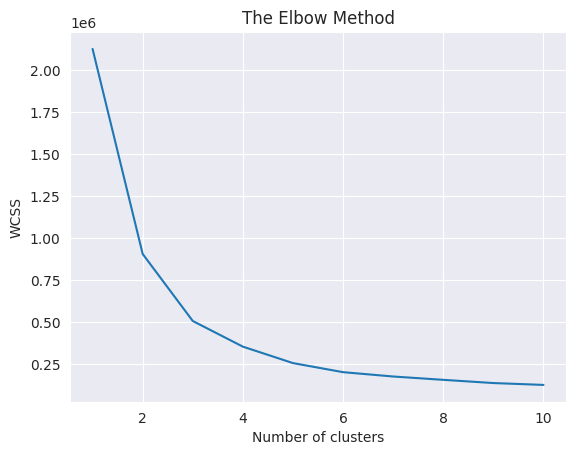

In [99]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

По данным графика можно сформировать 5 кластеров, дальнейшее увеличение количества кластеров не сильно сокращает WCSS.

In [100]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



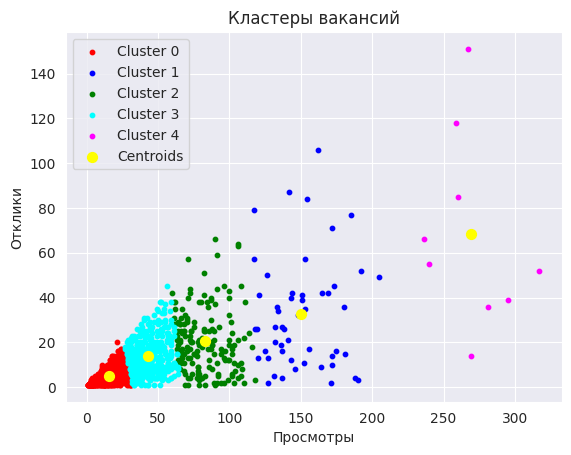

In [101]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Кластеры вакансий')
plt.xlabel('Просмотры')
plt.ylabel('Отклики')
plt.legend()
plt.show()

С увеличением номера кластера увеличивается его количество просмотров и откликов, так кластер 0 имеет меньше всего просмотров и откликов, 4 кластер максимальное количество откликов и просмотров.

На данном графике видно, разделение данных на 5 кластеров по количеству просмотров и количеству откликов. Кластеры 4 и 5 имеют наибольший разброс.

In [102]:
cluster_labels = list(map(lambda x: x, y_kmeans))
df['cluster'] = cluster_labels

Просмотрим кластеры детально

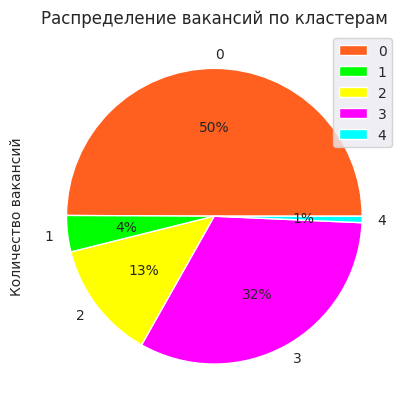

In [103]:
df.groupby(['cluster'])['status'].count().reset_index().plot(kind='pie', y='status',\
                                                         autopct='%1.0f%%',colors = ['#ff6020', '#00ff00', '#ffff00','#ff00ff', '#00ffff'],title='Распределение вакансий по кластерам')

plt.ylabel('Количество вакансий')
plt.show()

Вакансии распределились следующим образом:


*   0 кластер 641 вакансия — 50%;
*   1 кластер 51 вакансия — 4%;
*   2 кластер 166 вакансий — 13%;
*   3 кластер 417 вакансий — 32%;
*   4 кластер 9 вакансий — 1%.




In [104]:
result = df.groupby(['cluster', 'education'])['id'].count() \
    .reset_index(name='total')
display(result)

,cluster,education,total
0,0,"Другое, На смежных специальностях, Профильное",612
1,0,"На смежных специальностях, Профильное",27
2,0,Профильное,2
3,1,"Другое, На смежных специальностях, Профильное",51
4,2,"Другое, На смежных специальностях, Профильное",163
5,2,"На смежных специальностях, Профильное",3
6,3,"Другое, На смежных специальностях, Профильное",405
7,3,"На смежных специальностях, Профильное",12
8,4,"Другое, На смежных специальностях, Профильное",9


**Меньше просмотров у вакансий у которых в столбце `education` указано Профильное и На смежных специальностях, Профильное, но возможно это связано с маленькой выборкой данных.**

**Больше всего просмотров получают вакансии с образованием "Другое, На смежных специальностях, Профильное", возможно это связанно с тем что люди хотят сменить специальность на более прибыльную, и не хотят получать другое образование или для таких специальностей ещё нет официального образования.**

In [105]:
result = df.groupby(['cluster', 'experience'])['id'].count() \
    .reset_index(name='total')
display(result)

,cluster,experience,total
0,0,Без опыта,1
1,0,"До 1 года опыта, возможен опыт в pet-проектах",55
2,0,"До 1 года опыта, возможен опыт в pet-проектах;...",559
3,0,Опыт от 1 года,26
4,1,"До 1 года опыта, возможен опыт в pet-проектах;...",51
5,2,"До 1 года опыта, возможен опыт в pet-проектах",3
6,2,"До 1 года опыта, возможен опыт в pet-проектах;...",163
7,3,Без опыта,1
8,3,"До 1 года опыта, возможен опыт в pet-проектах",17
9,3,"До 1 года опыта, возможен опыт в pet-проектах;...",399


**В вакансиях с наибольшим количеством просмотров и откликов преобладает опыт работы "До 1 года опыта, возможен опыт в pet-проектах;без опыта".**

**Вакансии с опытом работы "Опыт от 1 года" всегда получали меньше просмотров и откликов.**

In [106]:
result = df.groupby(['cluster', 'work_format'])['id'].count() \
    .reset_index(name='total').sort_values(['cluster','total'],ascending=[True,False])
display(result)

,cluster,work_format,total
6,0,Удаленка,250
3,0,"Офис, Гибрид",148
2,0,Офис,79
4,0,"Офис, Гибрид, Удаленка",64
0,0,Гибрид,52
1,0,"Гибрид, Удаленка",46
5,0,"Офис, Удаленка",2
12,1,Удаленка,31
10,1,"Офис, Гибрид, Удаленка",10
8,1,"Гибрид, Удаленка",5


**В вакансиях с большим количеством просмотров, заметна большая заинтересованность к удаленному формату работу либо гибриду.**

**В то время как у наименее просматриваемых вакансиях на третьем месте стоит формат работы "Офис".**

In [107]:
result = df.groupby(['cluster', 'remote_work'])['id'].count() \
    .reset_index(name='total').sort_values(['cluster','total'],ascending=[True,False])
display(result)

,cluster,remote_work,total
1,0,1,362
0,0,0,279
3,1,1,47
2,1,0,4
5,2,1,148
4,2,0,18
7,3,1,330
6,3,0,87
9,4,1,8
8,4,0,1


**Если посмотреть на вакансии с возможностью удаленного формата работы, просматривают и кликают на них чаще.**

## Формулировка и проверка гипотез

## Гипотеза № 1

**Н0 Среднее количество просмотров у вакансий с городом Москва = Среднему количеству просмотров у вакансий без города Москвы**

**Н1 Среднее количество просмотров у вакансий с городом Москва ≠ Среднему количеству просмотров у вакансий без города Москвы**

Разделим данные на две группы: с Москвой и без, посмотрим распределение вакансий

In [108]:
moscow_views = df[df['is_moscow'] == 1]['views']
not_moscow_views = df[df['is_moscow'] == 0]['views']
print(f"Количество вакансий с городом Москва: {len(moscow_views)}")
print(f"Количество вакансий без города Москва: {len(not_moscow_views)}")

Количество вакансий с городом Москва: 964
Количество вакансий без города Москва: 320


Проверим нормальность распределения значений

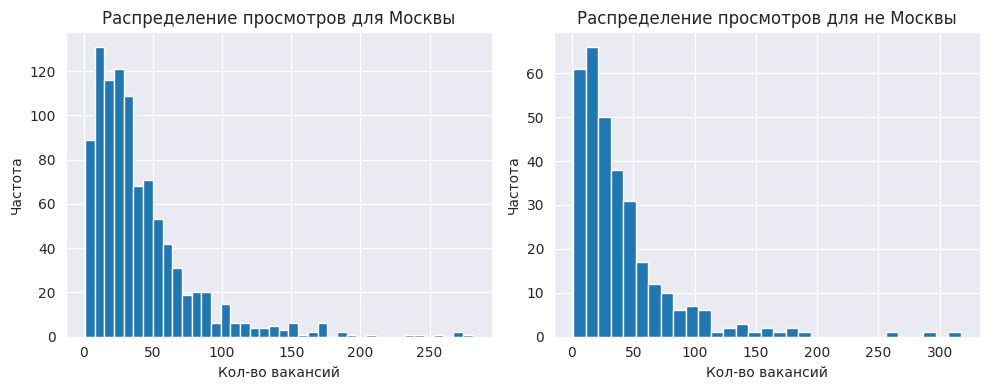

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(moscow_views.reset_index()['views'], bins='auto')
axs[0].set_title('Распределение просмотров для Москвы')
axs[0].set_xlabel('Кол-во вакансий')
axs[0].set_ylabel('Частота')

axs[1].hist(not_moscow_views.reset_index()['views'], bins='auto')
axs[1].set_title('Распределение просмотров для не Москвы')
axs[1].set_xlabel('Кол-во вакансий')
axs[1].set_ylabel('Частота')
plt.tight_layout()
plt.show()

In [110]:
def test_shapiro(column):
    result = st.shapiro(column)
    p_value = result[1]

    print("P-value:", p_value)
    if p_value < 0.05:
        print("Отвергаем нулевую гипотезу: распределение не нормально")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

In [111]:
test_shapiro(not_moscow_views)
test_shapiro(moscow_views)

P-value: 1.7836162737531354e-22
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 3.6945518827518234e-34
Отвергаем нулевую гипотезу: распределение не нормально


Данные распределены не нормально, это видно из графиков и также проведён тест Шапиро-Уилка, где p_value значительно меньше 0.05. Исходя из этого будет использоваться тест с критерием Манна-Уитни.

In [112]:
# Функция тест с критерием Манна-Уитни
def mannwhitneyu_test(group1, group2):
    statistic, p_value = mannwhitneyu(group1, group2)

    print("Statistic:", statistic)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Нет оснований отвергнуть нулевую гипотезу")

In [113]:
mannwhitneyu_test(moscow_views, not_moscow_views)

Statistic: 161635.5
P-value: 0.19816142482075305
Нет оснований отвергнуть нулевую гипотезу


**По полученным данным мы не можем отвергнуть нулевую гипотезу. Следовательно, указание города Москва не влияет на количество просмотров вакансии.**

## Гипотеза № 2

**Н0 Среднее количество просмотров у вакансий с городом Санкт-Петербург = Среднему количеству просмотров у вакансий без города Санкт-Петербург**

**Н1 Среднее количество просмотров у вакансий с городом Санкт-Петербург ≠ Среднему количеству просмотров у вакансий без города Санкт-Петербург**

Разделим данные на две группы: с Санкт-Петербургом и без, посмотрим распределение вакансий

In [114]:
saint_petersburg_views = df[df['is_saint_petersburg'] == 1]['views']
not_saint_petersburg_views = df[df['is_saint_petersburg'] == 0]['views']
print(f"Количество вакансий с городом Санкт-Петербург: {len(saint_petersburg_views)}")
print(f"Количество вакансий без города Санкт-Петербург: {len(not_saint_petersburg_views)}")

Количество вакансий с городом Санкт-Петербург: 195
Количество вакансий без города Санкт-Петербург: 1089


Проверим на нормальность распределения. Если распределение отличается от нормального, то используем тест с критерием Манни-Уитни.

In [115]:
test_shapiro(saint_petersburg_views)
test_shapiro(not_saint_petersburg_views)

P-value: 1.792851939162746e-19
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 2.092695485488752e-35
Отвергаем нулевую гипотезу: распределение не нормально


In [116]:
mannwhitneyu_test(saint_petersburg_views, not_saint_petersburg_views)

Statistic: 94772.5
P-value: 0.01676370623397235
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу. Наличие в вакансиях города Санкт-Петербург влияет на количество просмотров.**

## Гипотеза № 3

**Н0 Среднее количество откликов у вакансий с городом Санкт-Петербург = Среднему количеству откликов у вакансий без города Санкт-Петербург**

**Н1 Среднее количество откликов у вакансий с городом Санкт-Петербург ≠ Среднему количеству откликов у вакансий без города Санкт-Петербург**

In [117]:
saint_petersburg_responses = df[df['is_saint_petersburg'] == 1]['responses']
not_saint_petersburg_responses = df[df['is_saint_petersburg'] == 0]['responses']
print(f"Количество вакансий с городом Санкт-Петербург: {len(saint_petersburg_responses)}")
print(f"Количество вакансий без города Санкт-Петербург: {len(not_saint_petersburg_responses)}")

Количество вакансий с городом Санкт-Петербург: 195
Количество вакансий без города Санкт-Петербург: 1089


In [118]:
test_shapiro(saint_petersburg_responses)
test_shapiro(not_saint_petersburg_responses)

P-value: 5.266895239743459e-21
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 4.794618365804435e-39
Отвергаем нулевую гипотезу: распределение не нормально


In [119]:
mannwhitneyu_test(saint_petersburg_responses, not_saint_petersburg_responses)

Statistic: 98220.5
P-value: 0.09471146741144539
Нет оснований отвергнуть нулевую гипотезу


По полученным ченым данным мы не можем отвергнуть нулевую гипотезу. Следовательно, указание города Санкт-Петербург не влияет на количество откликов на вакансии.

## Гипотеза № 4

Проверим влияния месяца на количество просмотров вакансии. Ранее было установлено, что у месяцев 08, 09, 04 и 07 больше просмотров. Сформируем гипотезы.

**Н0 Среднее количество просмотров у вакансий опубликованной в месяцы [08, 09, 04 и 07] = Среднему количеству просмотров у вакансий опубликованных в прочие месяцы**

**Н1 Среднее количество просмотров у вакансий опубликованной в месяцы [08, 09, 04 и 07] ≠ Среднему количеству просмотров у вакансий опубликованных в прочие месяцы**

In [120]:
month_views = df[df['publication_month'].isin([8, 9, 4, 7])]['views']
not_month_views= df[~df['publication_month'].isin([8, 9, 4, 7])]['views']
display(len(month_views))
display(len(not_month_views))

540

744

Проверим нормальность распределения

In [121]:
test_shapiro(month_views)
test_shapiro(not_month_views)

P-value: 8.064038158984463e-27
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 3.372738030432984e-31
Отвергаем нулевую гипотезу: распределение не нормально


Данные распределены не нормально. Исходя из этого будет использоваться тест с критерием Манна-Уитни.

In [122]:
mannwhitneyu_test(month_views, not_month_views)

Statistic: 210102.0
P-value: 0.15970318552486074
Нет оснований отвергнуть нулевую гипотезу


**По полученным данным мы не можем отвергнуть нулевую гипотезу. Следовательно, публикация вакансии в месяцы [08, 09, 04 и 07] не влияет на количество просмотров вакансии.**

## Гипотеза № 5

Проверим гипотезу о влиянии месяца публикации на количество откликов на вакансию.

**Н0 Среднее количество откликов у вакансий опубликованной в месяцы [08, 10, 09 и 07] = Среднему количеству откликов у вакансий опубликованных в прочие месяцы**

**Н1 Среднее количество просмотров у вакансий опубликованной в месяцы [08, 10, 09 и 07 ≠ Среднему количеству просмотров у вакансий опубликованных в прочие месяцы**

In [123]:
month_responses= df[df['publication_month'].isin([8, 9, 10, 7])]['responses']
not_month_responses= df[~df['publication_month'].isin([8, 9, 10, 7])]['responses']
display(len(month_responses))
display(len(not_month_responses))

513

771

Проверим данные на нормальность распределения

In [124]:
test_shapiro(month_responses)
test_shapiro(not_month_responses)

P-value: 6.44828504002328e-30
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 3.5303199394963434e-33
Отвергаем нулевую гипотезу: распределение не нормально


Используем тест с критерием Манна-Уитни

In [125]:
mannwhitneyu_test(month_responses, not_month_responses)

Statistic: 220108.5
P-value: 0.0005840290177240029
Отвергаем нулевую гипотезу


**По полученным данным мы отвергаем нулевую гипотезу. Следовательно, публикация вакансии в месяцы [8, 9, 10, 7] влияет на количество откликов на вакансии.**

## Гипотеза № 6

**Н0 Среднее количество откликов у вакансий с возможностью работать удалено = Среднему количеству откликов у вакансий без возможности работать удалено**

**Н1 Среднее количество откликов у вакансий с возможностью работать удалено ≠ Среднему количеству откликов у вакансий без возможности работать удалено**

In [126]:
remote_work = df[df['remote_work'] == 1]['responses']
not_remote_work = df[df['remote_work'] == 0]['responses']
print(f"Количество вакансий с возможностью работать удалено: {len(remote_work)}")
print(f"Количество вакансий без возможности работать удалено: {len(not_remote_work)}")

Количество вакансий с возможностью работать удалено: 895
Количество вакансий без возможности работать удалено: 389


Посмотрим распределение и выберем тест

In [127]:
test_shapiro(remote_work)
test_shapiro(not_remote_work)

P-value: 5.965882431981068e-36
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 2.566254195982162e-26
Отвергаем нулевую гипотезу: распределение не нормально


In [128]:
mannwhitneyu_test(remote_work, not_remote_work)

Statistic: 223603.0
P-value: 4.533448235725741e-16
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу. Возможность работать удалено влияет на количество откликов.**

## Гипотеза № 7

**Н0 Среднее количество откликов у вакансий с наличием ссылки на тестовое задание = Среднему количеству откликов у вакансий без ссылки на тестовое задание**

**Н1 Среднее количество откликов у вакансий с наличием ссылки на тестовое задание ≠ Среднему количеству откликов у вакансий без ссылки на тестовое задание**

In [129]:
link_test = df[df['link_to_test'] == 'да']['responses']
not_link_test = df[df['link_to_test'] == 'нет']['responses']
print(f"Количество вакансий с ссылкой на тест: {len(link_test)}")
print(f"Количество вакансий без ссылки на тест: {len(not_link_test)}")

Количество вакансий с ссылкой на тест: 106
Количество вакансий без ссылки на тест: 1178


In [130]:
test_shapiro(link_test)
test_shapiro(not_link_test)

P-value: 4.1600014042244074e-14
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 5.004176945950354e-41
Отвергаем нулевую гипотезу: распределение не нормально


In [131]:
mannwhitneyu_test(link_test, not_link_test)

Statistic: 39862.0
P-value: 6.326652216505844e-10
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергается. Наблюдается влияние ссылки на тестовое задание на количество откликов.**

## Гипотеза № 8

**Н0 Среднее количество откликов у вакансий с доп. требованиями = Среднему количеству откликов у вакансий без доп. требований**

**Н1 Среднее количество откликов у вакансий с доп. требованиями ≠ Среднему количеству откликов у вакансий без доп. требований**

In [132]:
add_req= df[df['add_req_on'] == 'да']['responses']
not_add_req = df[df['add_req_on'] == 'нет']['responses']
print(f"Количество вакансий с доп.требованиями: {len(add_req)}")
print(f"Количество вакансий без доп.требований: {len(not_add_req)}")

Количество вакансий с доп.требованиями: 659
Количество вакансий без доп.требований: 625


In [133]:
test_shapiro(add_req)
test_shapiro(not_add_req)

P-value: 1.1732879949455681e-30
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 5.398758659236769e-33
Отвергаем нулевую гипотезу: распределение не нормально


In [134]:
mannwhitneyu_test(add_req, not_add_req)

Statistic: 209552.5
P-value: 0.5856947601744962
Нет оснований отвергнуть нулевую гипотезу


**Мы не опровергаем нулевую гипотезу о том, что нет статистически значимых различий в среднем количестве откликов на вакансии с дополнительными требованиями и без них.**

## Гипотеза № 9

**Н0 Среднее количество откликов у вакансий с указанной нижней планкой ЗП = Среднему количеству откликов у вакансий без указания ЗП**

**Н1 Среднее количество откликов у вакансий с указанной нижней планкой ЗП ≠ Среднему количеству откликов у вакансий без указания ЗП**

In [135]:
salary_from= df[df['salary_from_on'] == 1]['responses']
not_salary_from = df[df['salary_from_on'] == 0]['responses']
print(f"Количество вакансий с указанием нижней границы ЗП: {len(salary_from)}")
print(f"Количество вакансий без указания ЗП: {len(not_salary_from)}")

Количество вакансий с указанием нижней границы ЗП: 466
Количество вакансий без указания ЗП: 818


In [136]:
test_shapiro(salary_from)
test_shapiro(not_salary_from)

P-value: 4.838994126212183e-27
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 3.738569238730792e-36
Отвергаем нулевую гипотезу: распределение не нормально


In [137]:
mannwhitneyu_test(salary_from, not_salary_from)

Statistic: 190486.0
P-value: 0.9865551046845709
Нет оснований отвергнуть нулевую гипотезу


**Мы не можем отклонить нулевую гипотезу и делаем вывод, что нет статистически значимых различий в среднем количестве откликов на вакансии в зависимости от указания нижней планки заработной платы.**

## Гипотеза № 10

**Н0 Среднее количество откликов у вакансий с указанной верхней планкой ЗП = Среднему количеству откликов у вакансий без указания ЗП**

**Н1 Среднее количество откликов у вакансий с указанной верхней планкой ЗП ≠ Среднему количеству откликов у вакансий без указания ЗП**

In [138]:
salary_up= df[df['salary_up_to_on'] == 1]['responses']
not_salary_up = df[df['salary_up_to_on'] == 0]['responses']
print(f"Количество вакансий с указанием верхней границы ЗП: {len(salary_up)}")
print(f"Количество вакансий без указания ЗП: {len(not_salary_up)}")

Количество вакансий с указанием верхней границы ЗП: 370
Количество вакансий без указания ЗП: 914


In [139]:
test_shapiro(salary_up)
test_shapiro(not_salary_up)

P-value: 3.974950046639665e-25
Отвергаем нулевую гипотезу: распределение не нормально
P-value: 2.9061253076094602e-37
Отвергаем нулевую гипотезу: распределение не нормально


In [140]:
mannwhitneyu_test(salary_up, not_salary_up)

Statistic: 170454.5
P-value: 0.8204182076680883
Нет оснований отвергнуть нулевую гипотезу


**Мы не можем отклонить нулевую гипотезу и делаем вывод, что нет статистически значимых различий в среднем количестве откликов на вакансии в зависимости от указания верхней планки заработной платы.**

## Вывод


**При проведении корреляции выявлены следующие признаки:**
*   Наблюдается умеренная взаимосвязь между количеством просмотров и источником, форматом трудоустройства, форматом работы и месяцем публикации вакансии. Но высокое p_value у источника, формат работы и месяц публикации говорит о том, что это значение не является статистически значимым. Возможно, при больших данных связь была бы более явной.
*   Столбцы "add_req_on", "is_saint_petersburg" и "remote_work" имеют статистически значимую корреляцию с количеством откликов.

**При проведении кластерного анализа k-means выявлены следующие признаки:**

*   Меньше просмотров у вакансий у которых в столбце образование указано "Профильное" и "На смежных специальностях, Профильное", но возможно это связано с маленькой выборкой данных.

*   В вакансиях с наибольшим количеством просмотров и откликов преобладает опыт работы "До 1 года опыта, возможен опыт в pet-проектах;без опыта".

*   Вакансии с опытом работы "Опыт от 1 года" всегда получали меньше просмотров и откликов.

*   В вакансиях с большим количеством просмотров, заметна большая заинтересованность к удаленному формату работу, либо гибриду.

*   В то время как у наименее просматриваемых вакансиях на третьем месте стоит формат работы "Офис".


При проверке гипотез были выявлены следующие признаки:

1.   Отклонены гипотезы о влиянии на просмотры: указание города Москвы в вакансиях, о публикации вакансии в наиболее популярные месяцы по просмотрам вакансий(возможно, не хватает данных для подтверждения).
2.   Отклонены гипотезы о влиянии на отклики: указание города Санкт-Петербург, размещение в вакансии тестового задания, указание в вакансии дополнительных требований, и указание верхней и нижней границы заработной платы.
3.   Подтверждены гипотезы о влиянии на просмотры: указание города Санкт-Петербурга.
4.   Подтверждены гипотезы о влиянии на отклики: о публикации вакансии в наиболее популярные месяцы откликов на вакансии, возможности удаленного формата работы.

В качестве рекомендации HR агентству стоит:

1.   Брать вакансии с возможностью работы удалено.
2.   С требованиями к опыту работы "До 1 года опыта, возможен опыт в pet-проектах;без опыта".
3.   Стараться размещать вакансии в наиболее популярные месяцы откликов/просмотров, избегать зимнего периода.
4.  Избегать вакансий с требованием профильного образования.
5.  Отсутствие пунктов о доп. требованиях, уровне ЗП, наличии ссылки на тестовое задание не влияют на отклики, так как, возможно, работодатель сообщает данную информацию на этапе собеседования.